# LoanApplicationPrediction_Project is a Classification Model

In [1]:
print(('*'*127))
print("                                                      Loan Application Prediction                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Loan Application Prediction                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 14)


df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [4]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [5]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [6]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [7]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

* Here we observe that there is 422 for Yes and 192 on No for Loan Status and this column is our Target Variable

In [12]:
df.shape

(614, 13)

* Here we that there is 614 Rows and 13 Columns for this Dataset

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Here we observe Missing Values for Gender, Married, Dependants, Self_Employeed, LoanAmount, Loan_Amount_Term, Credit_History

In [14]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* Here we observe a Majority of Object-type Variables

# Dataset Descirption

This dataset includes details of applicants who have applied for loan. 


Individuals all around the world in some way depend on banks to lend them loans for various reasons
to help them overcome their financial constraints and achieve some personal goals. Due to the everchanging economy and ever-increasing competition in the financial world, the activity of taking a loan has
become inevitable.

small scale to large scale banking firms depend on the activity of lending out
loans to earn profits for managing their affairs and to function smoothly at times of financial
constraints. A loan is the major source of income for the banking sector as well as the biggest source of
financial risk for banks. Large portions of a bank’s assets directly come from the interests earned on
loans given


# Attributes

The dataset includes details as follows below: 

-- (1) Loan_ID - The different Loans that has been sanctioned is given an ID

-- (2) Gender - The type of sex give a loan 

-- (3) Married - The indivudual who has received a loan is single, divorced or married

-- (4) Dependents - The number of dependents/co-applicant, for eg. spouse, children or parents

-- (5) Education - This column categorises wether the candidate is Graduate or not

-- (6) Self_Employed - This column categorises wether the candidate is Self_Employed or not

-- (7) ApplicantIncome - This column the candidates Income in dollars

-- (8) CoapplicantIncome - In case you apply for a home loan with a co-applicant, the lender considers the incomes of bot                                  applicants.

-- (9) LoanAmount - The Amount sanctioned to the candidate is given in dollars

-- (10) Loan_Amount_Term - The Term of Loan within which the loan must be cleared by the candidate with interest

-- (11) Credit_History - Specifies the critical part wether or not the loan must be sanctioned to the candidate

-- (12) Property_Area - This categorical column specifies wether the candidate has property in Rural or Urban area

# Data Cleaning

# To Treat Missing Values

In [15]:
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

In [16]:
# To Encode those Columns for later Treating Missing Values

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df["Gender"] = lb.fit_transform(df["Gender"])
df["Married"] = lb.fit_transform(df["Married"])
df["Self_Employed"] = lb.fit_transform(df["Self_Employed"])
df["Dependents"] = lb.fit_transform(df["Dependents"])

# To Perform Ordinal Encoding

In [17]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1,0,0,0.0,0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1,1,1,0.0,0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1,1,0,0.0,1,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1,1,0,1.0,0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1,0,0,0.0,0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0,0,0,0.0,0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1,1,3,0.0,0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1,1,1,0.0,0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1,1,2,0.0,0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking VIF ( Variance Inflation Factor )

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,0,0.0,0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1,1,1,0.0,0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1,1,0,0.0,1,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1,1,0,1.0,0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1,0,0,0.0,0,6000,0.0,141.000000,360.0,1.0,2.0


In [21]:
calculate_vif(F)

,F,VIF_Value
0,Loan_ID,3.767819
1,Gender,5.384630
2,Married,3.563463
3,Dependents,1.822516
4,Education,1.310485
5,Self_Employed,1.219756
6,ApplicantIncome,2.898871
7,CoapplicantIncome,1.488134
8,LoanAmount,6.826917
9,Loan_Amount_Term,11.536953


* In the above VIF score we observe that there is no Multicolinearity and there is no need to remve any columns

# Outlier Check and Removal

In [22]:
df1 = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

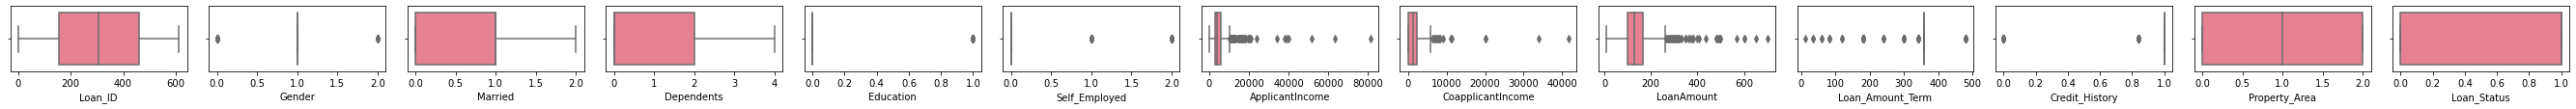

In [23]:
Columns = df1.columns.values
ncolumns = 14
nrows = 10
plt.figure(figsize=[40,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='husl')
    plt.tight_layout()

In [24]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(614, 13)

In [25]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([7, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 6, 8, 9, 6, 8, 5, 5, 6, 8,
       7, 8, 6, 6, 5, 5, 5, 9, 9, 5, 8, 5, 8, 9, 5, 6, 8, 5, 5, 8, 5, 5,
       5, 7, 6, 5, 7, 5, 8, 6, 5, 5, 5, 8, 9, 9, 8, 8, 8, 5, 5, 9, 8, 9,
       5, 7, 9, 5, 7, 5, 8], dtype=int64))


In [26]:
new_df.shape

(548, 13)

# DataLoss %

In [27]:
Loss = (614/548)/614*100

In [28]:
Loss

0.18248175182481752

* Here we observe a Datasloss of 0.18% after the Outlier check and removal

In [29]:
new_df['Gender'].value_counts()

1    437
0    100
2     11
Name: Gender, dtype: int64

In [30]:
new_df['Married'].value_counts()

1    355
0    190
2      3
Name: Married, dtype: int64

In [31]:
new_df['Dependents'].value_counts()

0    313
2     90
1     87
3     43
4     15
Name: Dependents, dtype: int64

In [32]:
new_df['Self_Employed'].value_counts()

0    475
1     73
Name: Self_Employed, dtype: int64

In [33]:
new_df['Education'].value_counts()

0.0    423
1.0    125
Name: Education, dtype: int64

In [34]:
new_df['Loan_Amount_Term'].value_counts()

360.0    466
180.0     39
480.0     14
342.0     13
300.0     12
240.0      4
Name: Loan_Amount_Term, dtype: int64

In [35]:
new_df['Credit_History'].value_counts()

1.000000    423
0.000000     85
0.842199     40
Name: Credit_History, dtype: int64

In [36]:
new_df['Property_Area'].value_counts()

1.0    208
2.0    179
0.0    161
Name: Property_Area, dtype: int64

In [37]:
new_df['Loan_Status'].value_counts()

1.0    377
0.0    171
Name: Loan_Status, dtype: int64

# EDA 

# Univariate Analysis

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

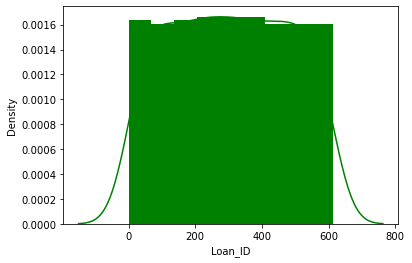

In [38]:
sn.distplot(new_df["Loan_ID"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data for Loan ID dataset

<AxesSubplot:xlabel='Gender', ylabel='Density'>

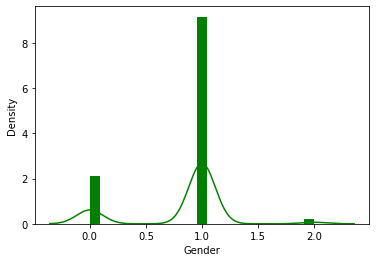

In [39]:
sn.distplot(new_df["Gender"], hist_kws={'alpha':1}, color='g')

* Here we observe a moderate skewness of data for Gender dataset

<AxesSubplot:xlabel='Married', ylabel='Density'>

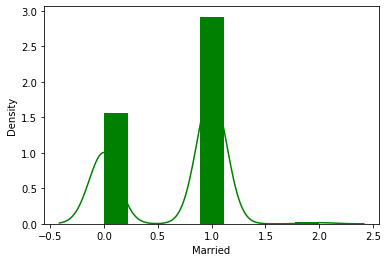

In [40]:
sn.distplot(new_df["Married"], hist_kws={'alpha':1}, color='g')

* Here we observe a mild negative skewness of data for Married dataset

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

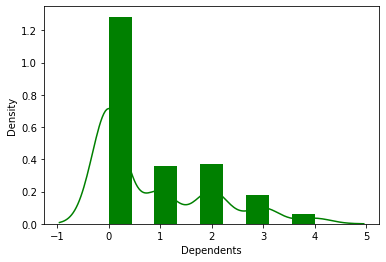

In [41]:
sn.distplot(new_df["Dependents"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for Dependents dataset

<AxesSubplot:xlabel='Education', ylabel='Density'>

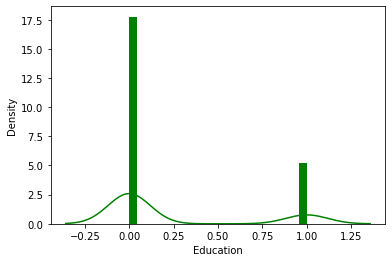

In [42]:
sn.distplot(new_df["Education"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for Education dataset

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

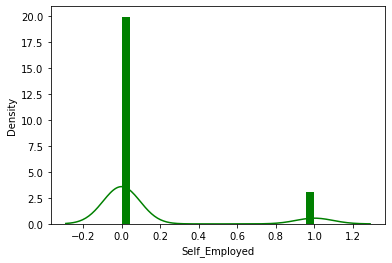

In [43]:
sn.distplot(new_df["Self_Employed"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for Self_Employed dataset

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

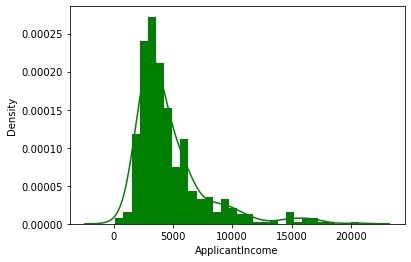

In [44]:
sn.distplot(new_df["ApplicantIncome"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for ApplicantIncome dataset

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

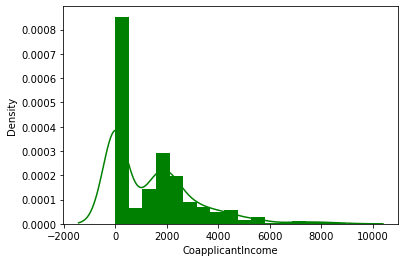

In [45]:
sn.distplot(new_df["CoapplicantIncome"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for CoapplicantIncome dataset

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

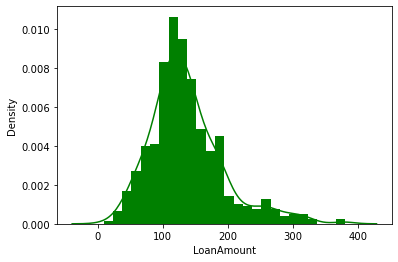

In [46]:
sn.distplot(new_df["LoanAmount"], hist_kws={'alpha':1}, color='g')

* Here we observe a high positive skewness of data for LoanAmount dataset

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

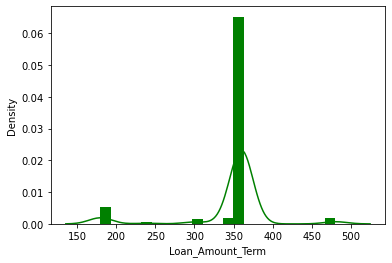

In [47]:
sn.distplot(new_df["Loan_Amount_Term"], hist_kws={'alpha':1}, color='g')

* Here we observe a high negative skewness of data for Loan_Amount_Term dataset

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

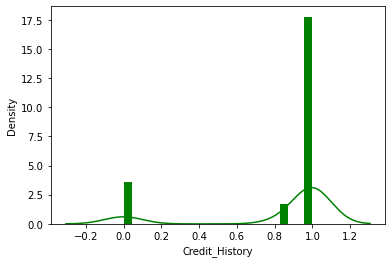

In [48]:
sn.distplot(new_df["Credit_History"], hist_kws={'alpha':1}, color='g')

* Here we observe a high negative skewness of data for Credit_History dataset

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

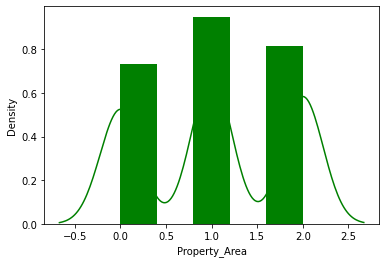

In [49]:
sn.distplot(new_df["Property_Area"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data for Property_Area dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

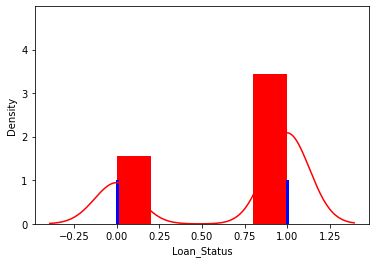

In [50]:
sn.distplot(new_df["Loan_Status"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

* Here we observe a moderate negative skewness of data for Property_Area dataset

# Scatterplot

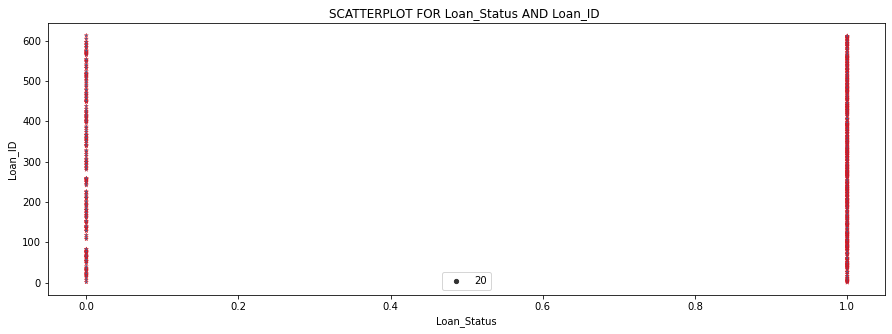

In [51]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Loan_ID ')

sn.scatterplot(new_df['Loan_Status'], new_df['Loan_ID'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is majority on the Yes side for all Loan IDs

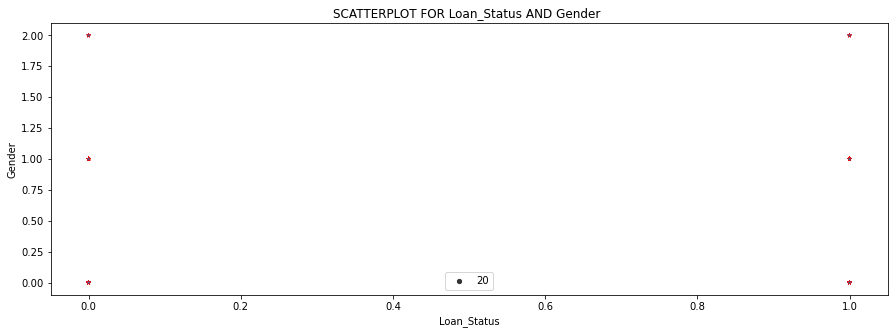

In [52]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Gender ')

sn.scatterplot(new_df['Loan_Status'], new_df['Gender'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distributed for both the Genders

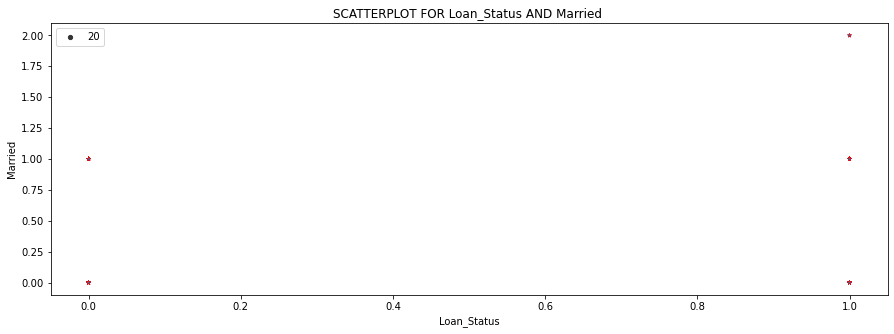

In [53]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Married ')

sn.scatterplot(new_df['Loan_Status'], new_df['Married'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distributed for both Married Status 

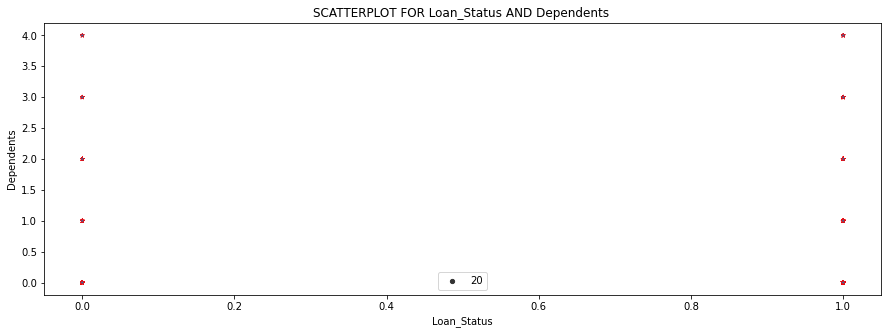

In [54]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Dependents ')

sn.scatterplot(new_df['Loan_Status'], new_df['Dependents'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distributed for all the types of Dependants

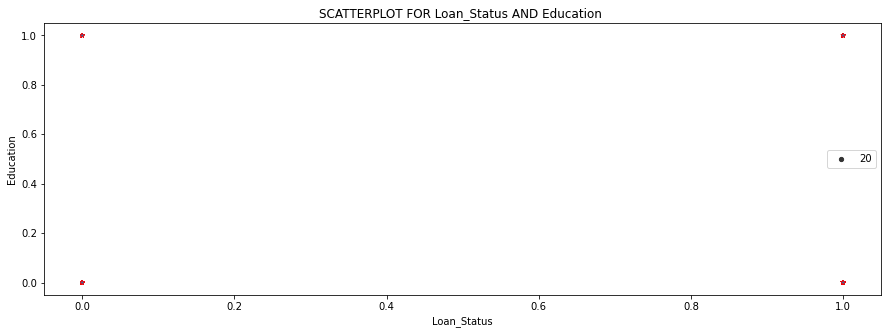

In [55]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Education ')

sn.scatterplot(new_df['Loan_Status'], new_df['Education'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distributed for all Education types

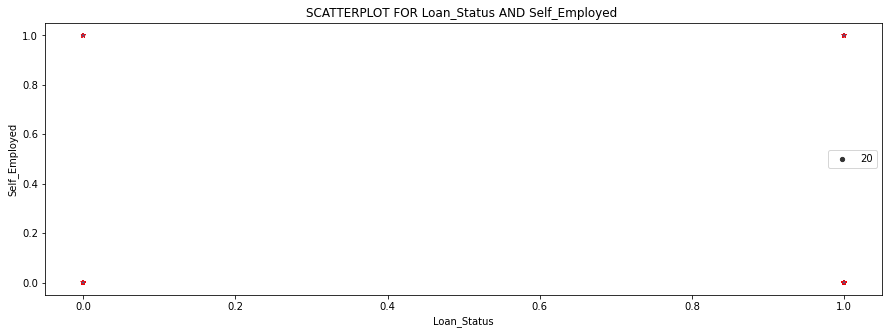

In [56]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Self_Employed ')

sn.scatterplot(new_df['Loan_Status'], new_df['Self_Employed'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distibuted for all Self employeed status

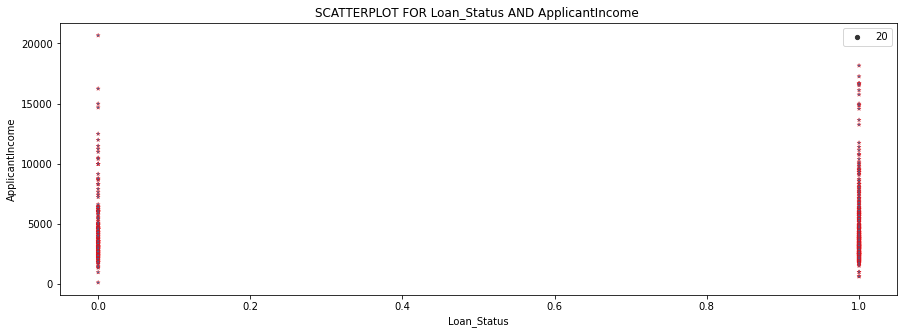

In [57]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND ApplicantIncome ')

sn.scatterplot(new_df['Loan_Status'], new_df['ApplicantIncome'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status on yes side for Applicants Income is Majority on those Earning between 5k to 15K

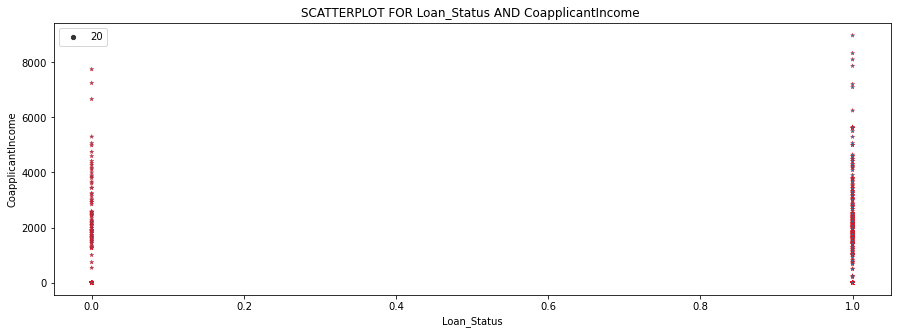

In [58]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND CoapplicantIncome ')

sn.scatterplot(new_df['Loan_Status'], new_df['CoapplicantIncome'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan status is majority on the Yes side for Co applicant Income who are earning between 4k to 6K

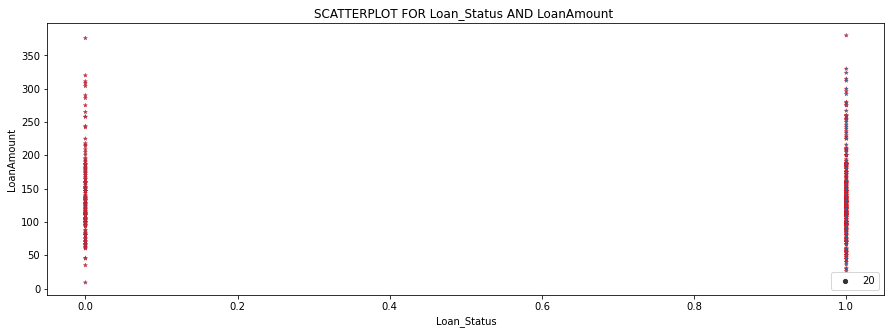

In [59]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND LoanAmount ')

sn.scatterplot(new_df['Loan_Status'], new_df['LoanAmount'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan status on the Yes side is majority on the 50 to 250 for the Loan Amount

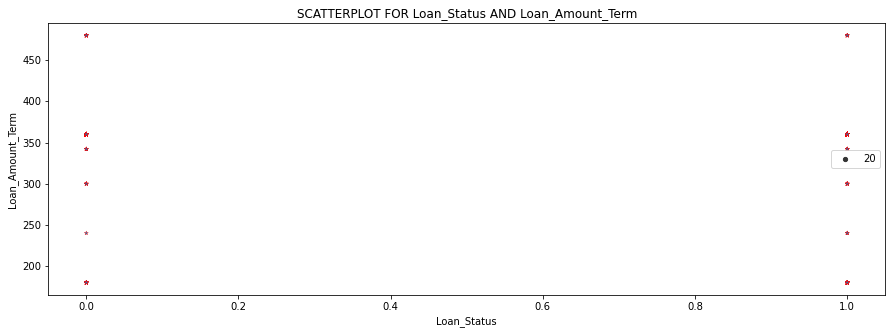

In [60]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Loan_Amount_Term')

sn.scatterplot(new_df['Loan_Status'], new_df['Loan_Amount_Term'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status for both Yes and No is equally for Loan_Amount_Term

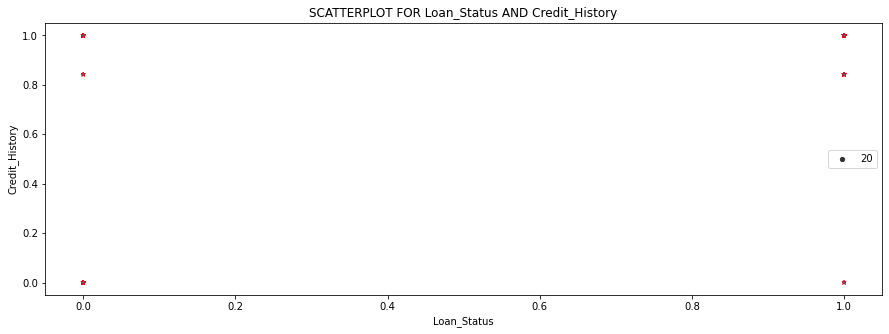

In [61]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Credit_History')

sn.scatterplot(new_df['Loan_Status'], new_df['Credit_History'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equally distributed on both Yes and No for all Credit History values

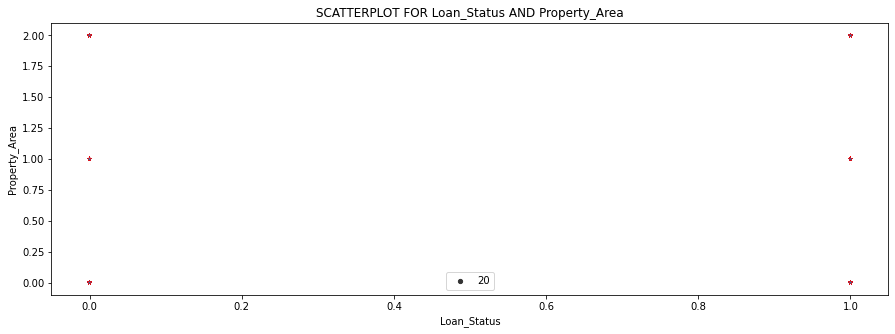

In [62]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Loan_Status AND Property_Area')

sn.scatterplot(new_df['Loan_Status'], new_df['Property_Area'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe that Loan Status is equaly distributed on Yes and No for all Property Area values

# Catplot

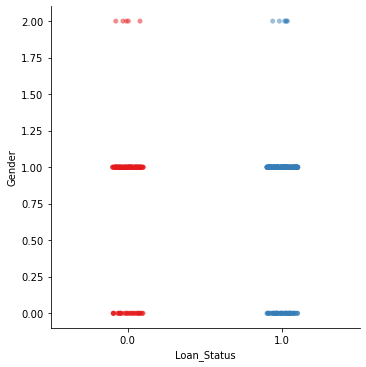

In [63]:
sn.catplot(x="Loan_Status", y="Gender", kind='strip',data=new_df, alpha=0.5, color='k', palette="Set1")

* Here we observe that Gender class 1-Male has equal distribution on both Loan status

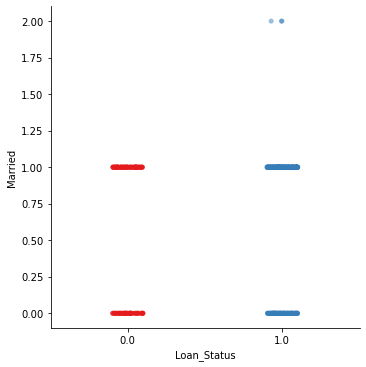

In [64]:
sn.catplot(x="Loan_Status", y="Married", kind='strip',data=new_df, alpha=0.5, color='k', palette="Set1")

* Here we observe that both categories of Married has equal distribution of data on Approved Loan status

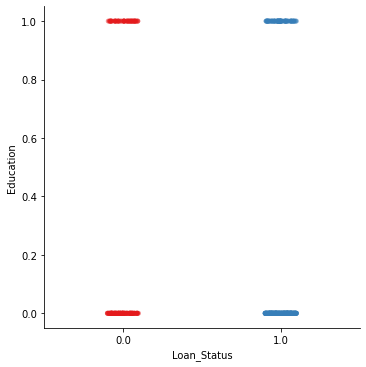

In [65]:
sn.catplot(x="Loan_Status", y="Education", kind='strip',data=new_df, alpha=0.5, color='k', palette="Set1")

* Here we observe that there is equal distribution of data on both Education classes

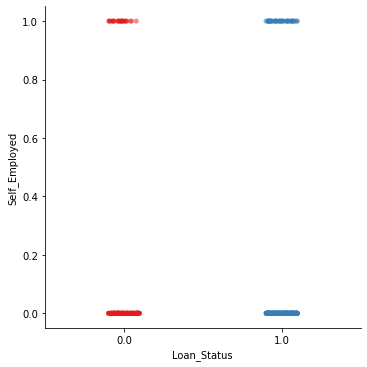

In [66]:
sn.catplot(x="Loan_Status", y="Self_Employed", kind='strip',data=new_df, alpha=0.5, color='k', palette="Set1")

* Here we observe that Self-employed class 0-Not self employeed has equal distribtuion of data on both Loan Status

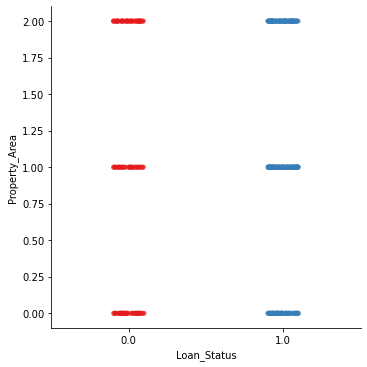

In [67]:
sn.catplot(x="Loan_Status", y="Property_Area", kind='strip',data=new_df, alpha=0.5, color='k', palette="Set1")

* Here we observe that Propery Area all classes have almost equal distribution on both Loan Status

# Countplot

<AxesSubplot:xlabel='count', ylabel='Dependents'>

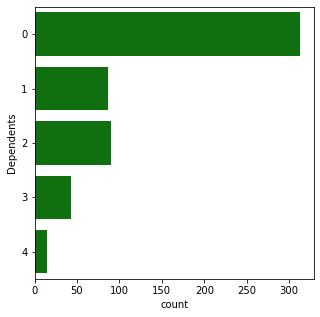

In [68]:
plt.figure(figsize=(5,5))

sn.countplot(y=new_df['Dependents'], data=df, color='g')

* Here we observe that Dependents Value No 0 has the Highest count in the Dataset

<AxesSubplot:xlabel='count', ylabel='LoanAmount'>

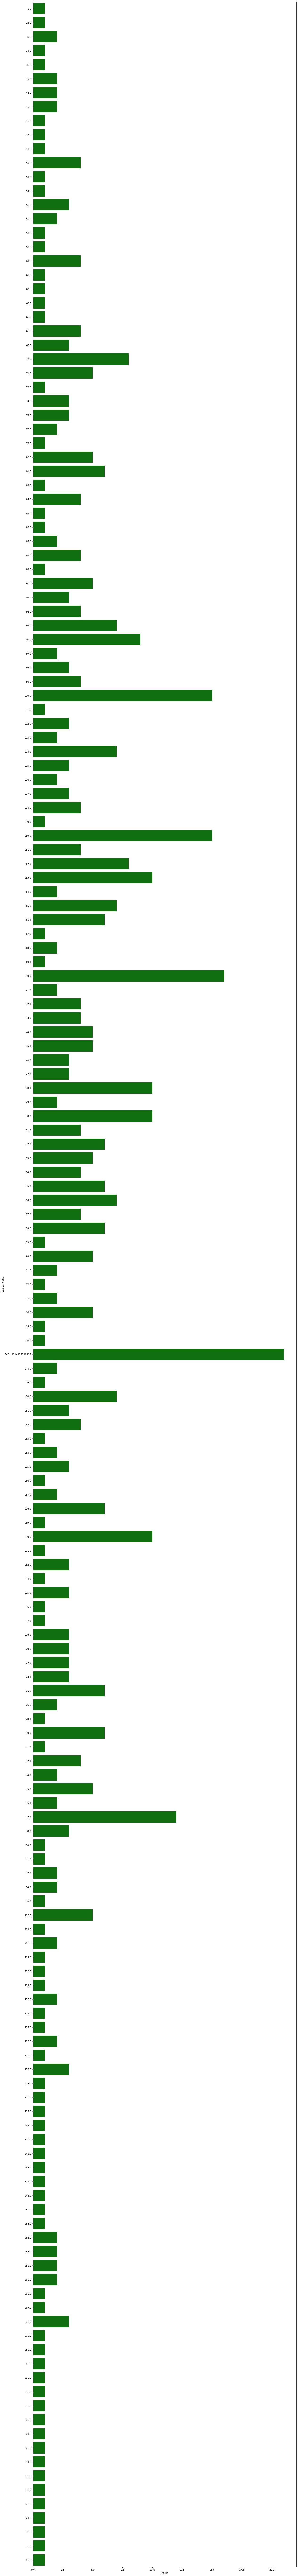

In [69]:
plt.figure(figsize=(20,200))

sn.countplot(y=new_df['LoanAmount'], data=df, color='g')

* Here we observe that Loan Amount No 146.4 has the highest count in the Dataset

<AxesSubplot:xlabel='count', ylabel='CoapplicantIncome'>

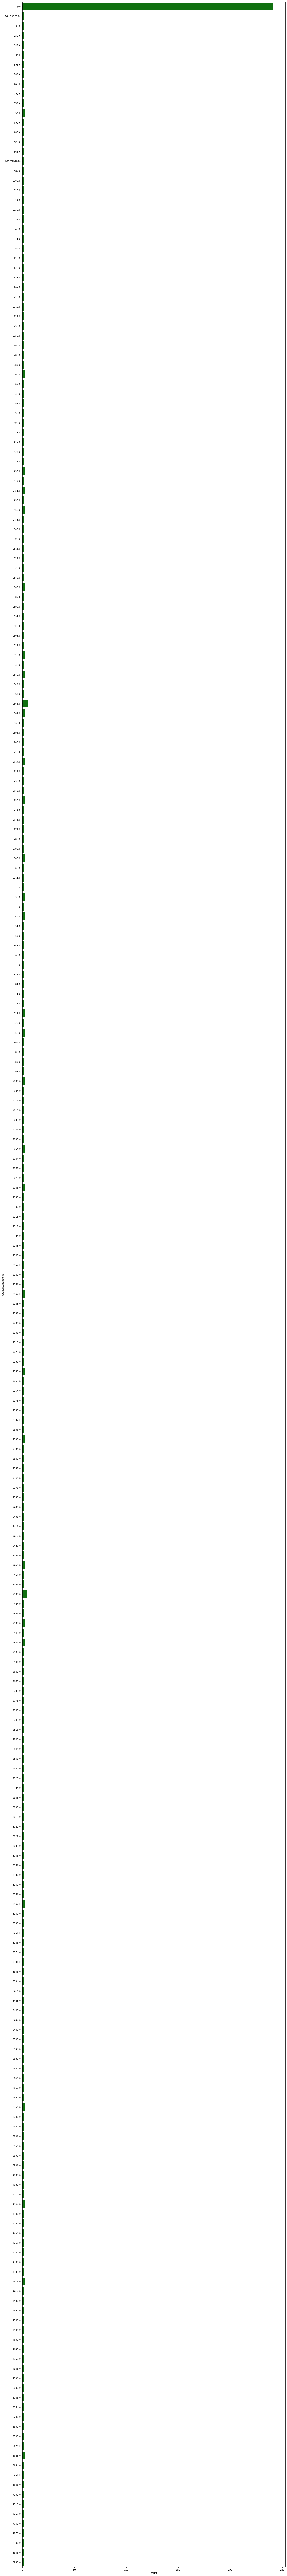

In [70]:
plt.figure(figsize=(20,200))

sn.countplot(y=new_df['CoapplicantIncome'], data=df, color='g')

* Here we observe that Coapplicant Income Value 0 has the highest count in the Data

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

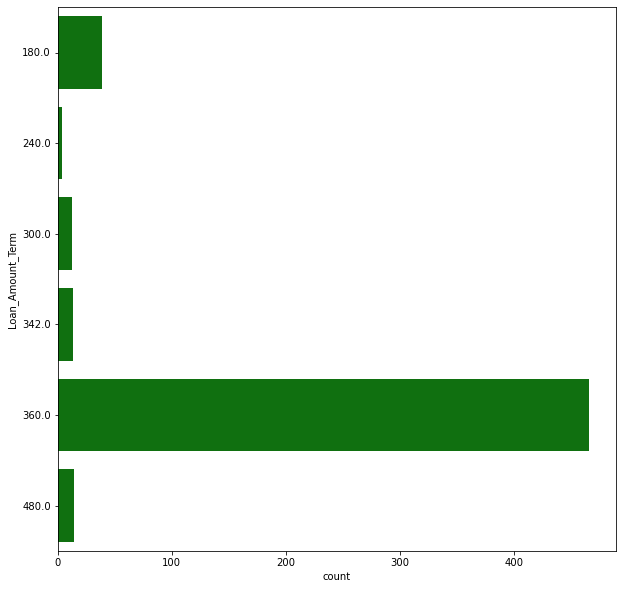

In [71]:
plt.figure(figsize=(10,10))

sn.countplot(y=new_df['Loan_Amount_Term'], data=df, color='g')

* Here we observe that Loan Amount Term value No 360.0 has the highest count in the Dataset

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

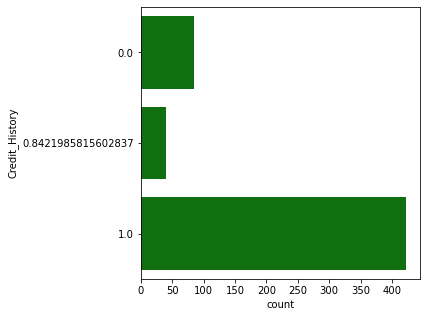

In [72]:
plt.figure(figsize=(5,5))

sn.countplot(y=new_df['Credit_History'], data=df, color='g')

* Here we observe that Credit History data value 1.0 has the highest count in the Dataset

# BiVariate Analysis

# Pairplot

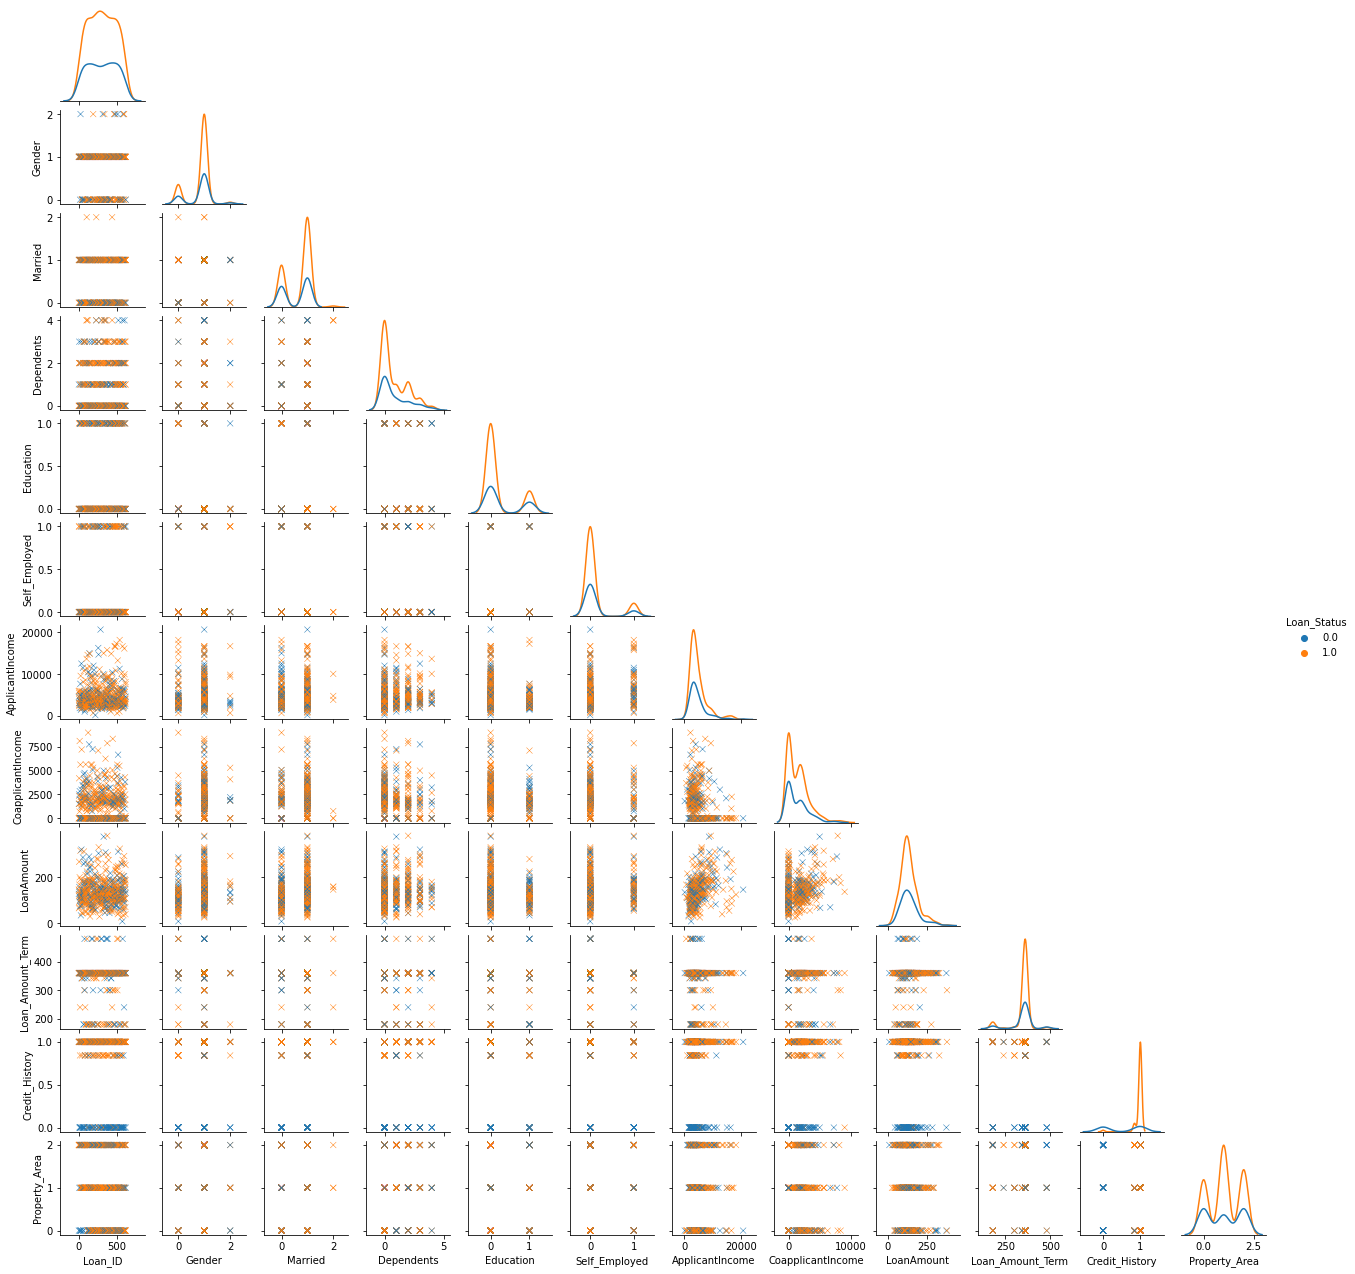

In [73]:
sn.pairplot(new_df, hue="Loan_Status", height=1.5, markers="x", corner=True, diag_kws=dict(fill=False))

* In the above PairPlot we observe that Loan_Status has the best Paired distribution with Loan_ID and Property_Area

# Stats Heatmap

In [74]:
new_df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.00000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,305.605839,0.837591,0.658759,0.832117,0.228102,0.133212,4710.401460,1422.68781,136.557765,347.638686,0.833372,1.032847,0.687956
std,176.294050,0.420119,0.485979,1.126833,0.419992,0.340114,3016.685478,1670.91470,56.869317,52.129716,0.359720,0.787713,0.463751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,152.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2824.500000,0.00000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,304.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3787.500000,1239.50000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,457.250000,1.000000,1.000000,2.000000,0.000000,0.000000,5669.500000,2250.00000,160.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,1.000000,20667.000000,8980.00000,380.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

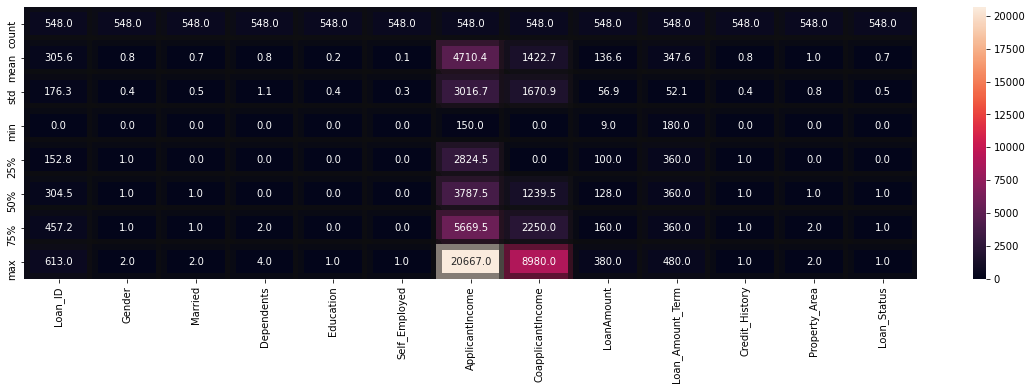

In [75]:
plt.figure(figsize=(20,5))
sn.heatmap(new_df.describe(), annot=True, linewidth=10, linecolor='#0f0f0f80', fmt='0.1f')

# Outcome of the Dataset Stats

# Total No of Rows and Columns are:
    614, 13
    
    *   Loan_ID:
    mean=305.605839
    std=176.294050
    min=0.000000
    max=613.000000
    


    * Gender:
    mean=0.837591
    std=0.420119
    min=0.000000
    max=2.000000
    



    * Married:
    mean=0.658759
    std=0.485979
    min=0.000000
    max=2.000000
    
    
    
    
    * Dependents:
    mean=0.832117
    std=1.126833
    min=0.000000
    max=4.000000
    



    * Education:
    mean=0.228102
    std=0.419992
    min=0.000000
    max=1.000000
    
   
   
   
    * Self_Employed:
    mean=0.133212
    std=0.340114
    min=0.000000
    max=1.000000
    




    * ApplicantIncome:
    mean=4710.401460
    std=3016.685478
    min=150.000000
    max=20667.000000
    




    * CoapplicantIncome:
    mean=1422.68781
    std=1670.91470
    min=0.00000
    max=8980.00000
    



    * LoanAmount:
    mean=136.557765
    std=56.869317
    min=9.000000
    max=380.000000
    



    * Loan_Amount_Term:
    mean=347.638686
    std=52.129716
    min=180.000000
    max=480.000000
    




    * Credit_History:
    mean=0.833372
    std=0.359720
    min=0.000000
    max=1.000000
    



    * Property_Area:
    mean=1.032847
    std=0.787713
    min=0.000000
    max=2.000000
    



    * Loan_Status:
    mean=0.687956
    std=0.463751
    min=0.000000
    max=1.000000

# Correlation Heatmap

In [76]:
cor=new_df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.024583,-0.010876,0.069358,0.039290,0.036154,0.042001,-0.059528,0.007527,-0.017784,-0.046613,-0.164043,0.008108
Gender,0.024583,1.000000,0.345894,0.158556,0.034202,0.023744,0.026755,0.189977,0.159188,-0.097345,0.007141,-0.033569,0.011524
Married,-0.010876,0.345894,1.000000,0.339199,0.023781,-0.023110,0.000328,0.220988,0.169818,-0.130005,0.026943,0.015007,0.102595
Dependents,0.069358,0.158556,0.339199,1.000000,0.077201,0.039380,0.088208,-0.047031,0.119121,-0.066204,-0.054665,0.030939,-0.005975
Education,0.039290,0.034202,0.023781,0.077201,1.000000,-0.008337,-0.168418,-0.042460,-0.150237,-0.105447,-0.087402,-0.050318,-0.103196
Self_Employed,0.036154,0.023744,-0.023110,0.039380,-0.008337,1.000000,0.248058,-0.040733,0.120558,-0.034400,-0.009342,-0.030009,-0.025740
ApplicantIncome,0.042001,0.026755,0.000328,0.088208,-0.168418,0.248058,1.000000,-0.213538,0.443894,-0.053087,0.053089,-0.009007,0.007848
CoapplicantIncome,-0.059528,0.189977,0.220988,-0.047031,-0.042460,-0.040733,-0.213538,1.000000,0.314699,-0.072115,-0.023867,-0.099388,0.038806
LoanAmount,0.007527,0.159188,0.169818,0.119121,-0.150237,0.120558,0.443894,0.314699,1.000000,0.030579,0.007955,-0.093593,-0.027363
Loan_Amount_Term,-0.017784,-0.097345,-0.130005,-0.066204,-0.105447,-0.034400,-0.053087,-0.072115,0.030579,1.000000,0.033791,-0.061149,-0.011024


<AxesSubplot:>

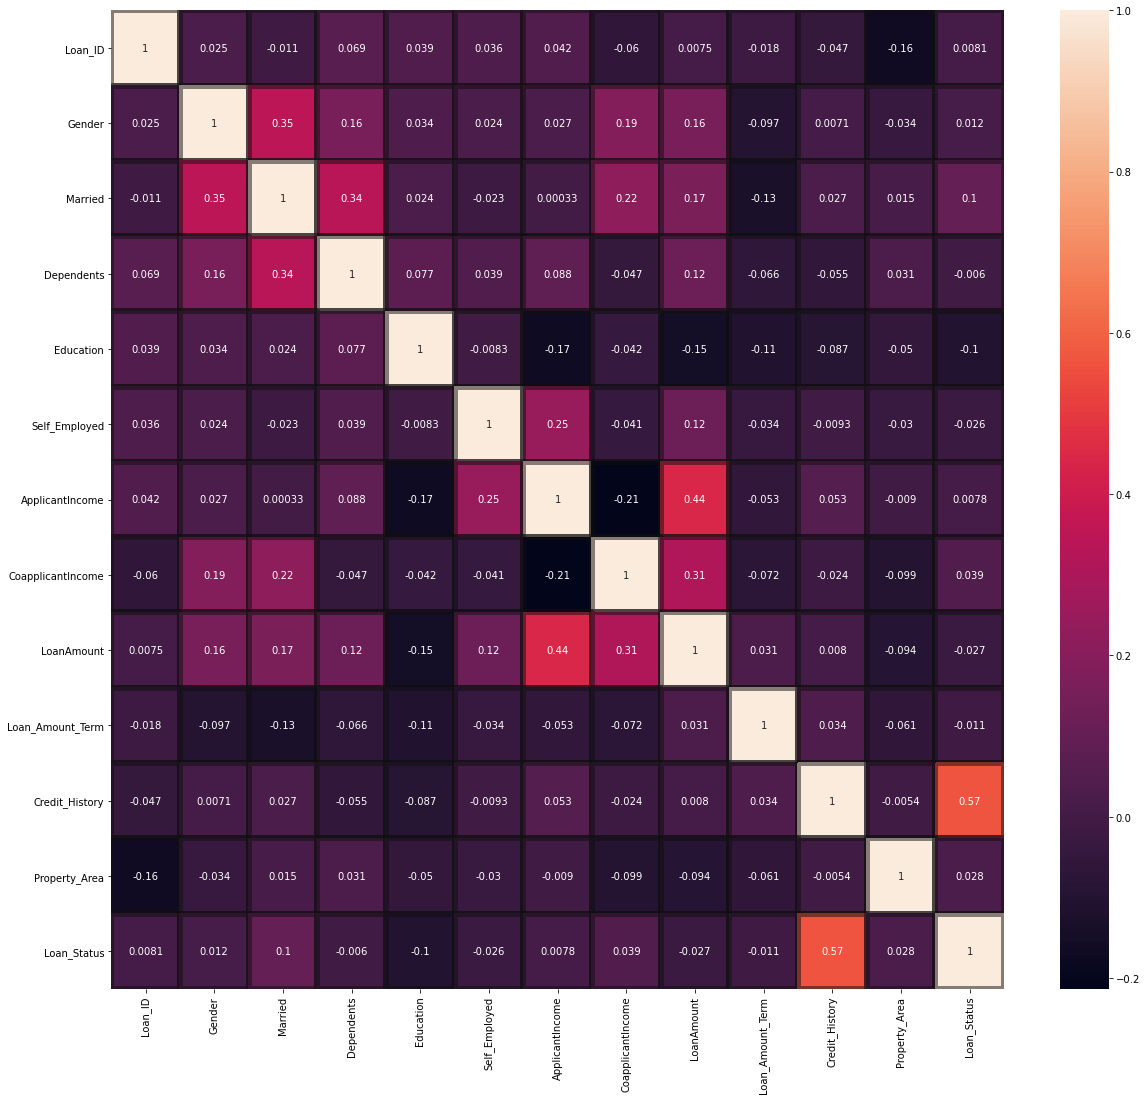

In [77]:
plt.figure(figsize=(20,18))
sn.heatmap(cor, annot=True, linewidth=5, linecolor='#0f0f0f80')

* In the above plot we observe that Loan_Status column has the best correlation with Credit_History and Married Column

# To check the columns +ve and -ve correlated

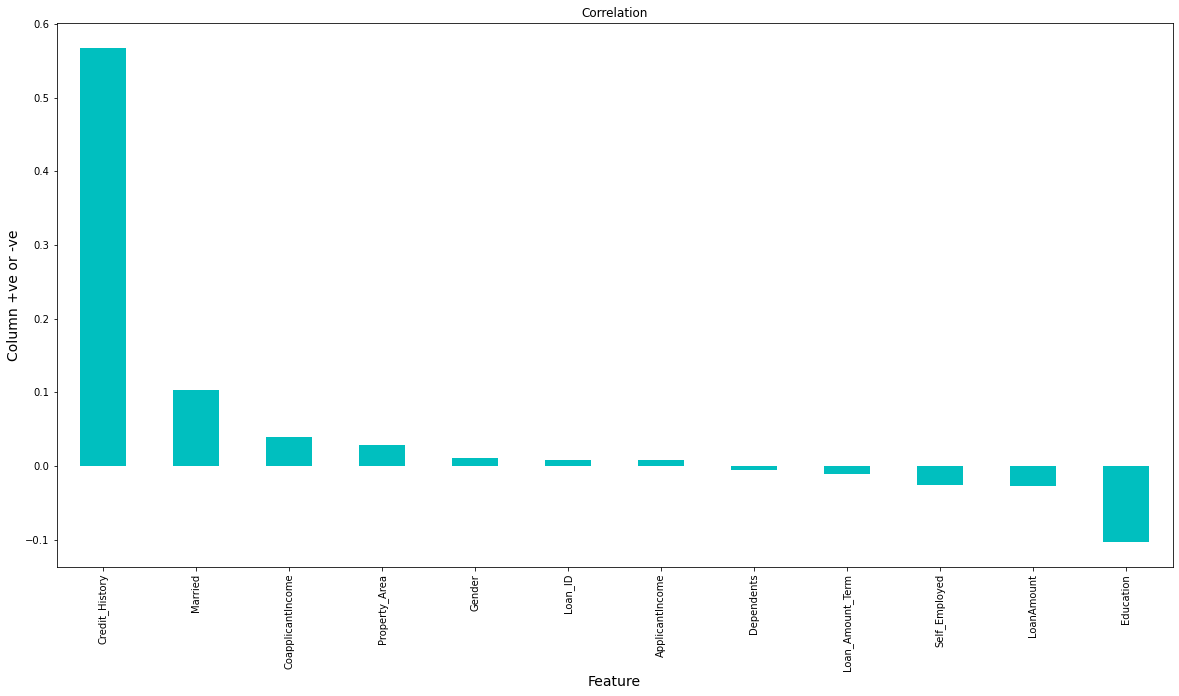

In [78]:
plt.figure(figsize=(20,10))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column +ve or -ve', fontsize=14)
plt.title('Correlation', fontsize=12)
plt.show()

* From the Above Plot we confirm that Credit_History and Married has the best Correlation with Loan_status Column

# DataPreprocessing

# Check and Balancing Columns with Imbalances to avoid Bias

In [79]:
GN = new_df.columns.tolist()
GN = [col for col in GN if col not in ['Gender']]

target1 = 'Gender'

state = np.random.RandomState(42)
a = new_df[GN]
b = new_df[target1]

a_outliers = state.uniform(low=0, high=1, size=(a.shape[0], a.shape[1]))
print(a.shape)

(548, 12)


In [80]:
MR = new_df.columns.tolist()
MR = [col for col in MR if col not in ['Married']]

target2 = 'Married'

state = np.random.RandomState(42)
c = new_df[MR]
d = new_df[target2]

c_outliers = state.uniform(low=0, high=1, size=(c.shape[0], c.shape[1]))
print(c.shape)

(548, 12)


In [81]:
EDN = new_df.columns.tolist()
EDN = [col for col in EDN if col not in ['Education']]

target3 = 'Education'

state = np.random.RandomState(42)
e = new_df[EDN]
f = new_df[target3]

e_outliers = state.uniform(low=0, high=1, size=(e.shape[0], e.shape[1]))
print(e.shape)

(548, 12)


In [82]:
SE = new_df.columns.tolist()
SE = [col for col in SE if col not in ['Self_Employed']]

target4 = 'Self_Employed'

state = np.random.RandomState(42)
g = new_df[SE]
h = new_df[target4]

g_outliers = state.uniform(low=0, high=1, size=(g.shape[0], g.shape[1]))
print(g.shape)

(548, 12)


In [83]:
DP = new_df.columns.tolist()
DP = [col for col in DP if col not in ['Dependents']]

target5 = 'Dependents'

state = np.random.RandomState(42)
i = new_df[DP]
j = new_df[target5]

i_outliers = state.uniform(low=0, high=1, size=(i.shape[0], i.shape[1]))
print(i.shape)

(548, 12)


In [84]:
LAT = new_df.columns.tolist()
LAT = [col for col in LAT if col not in ['Loan_Amount_Term']]

target7 = 'Loan_Amount_Term'

state = np.random.RandomState(42)
o = new_df[LAT]
p = new_df[target7]

o_outliers = state.uniform(low=0, high=1, size=(o.shape[0], o.shape[1]))
print(o.shape)

(548, 12)


Text(0, 0.5, 'Frequency')

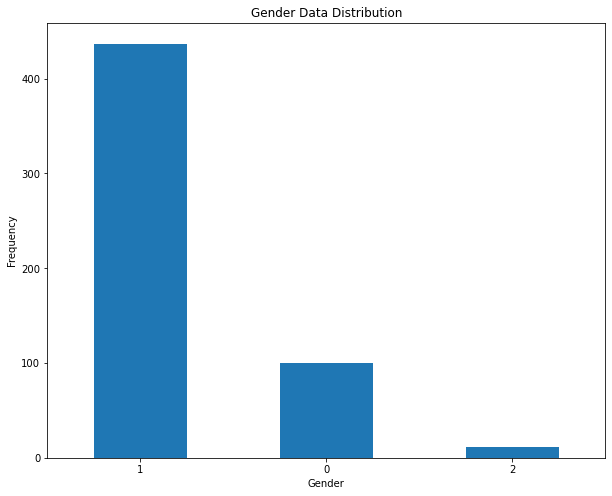

In [85]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Gender'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Gender Data Distribution")


plt.xlabel("Gender")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

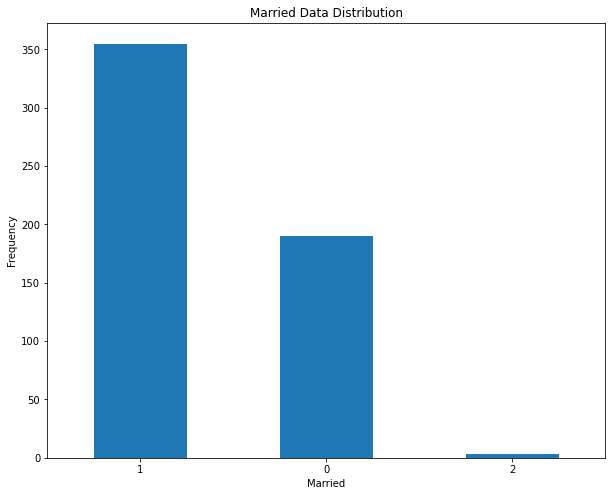

In [86]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Married'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Married Data Distribution")


plt.xlabel("Married")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

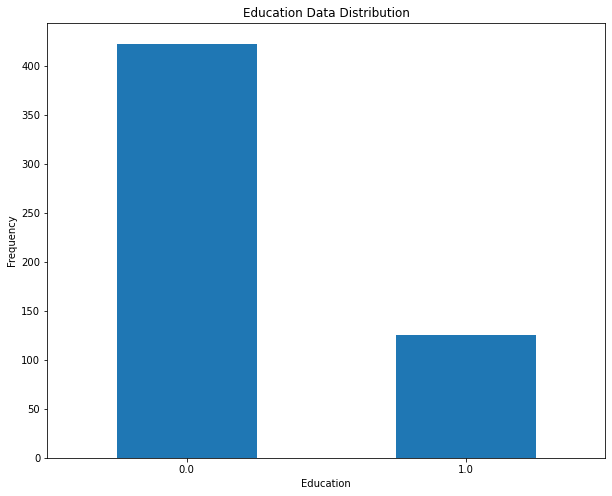

In [87]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Education'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Education Data Distribution")


plt.xlabel("Education")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

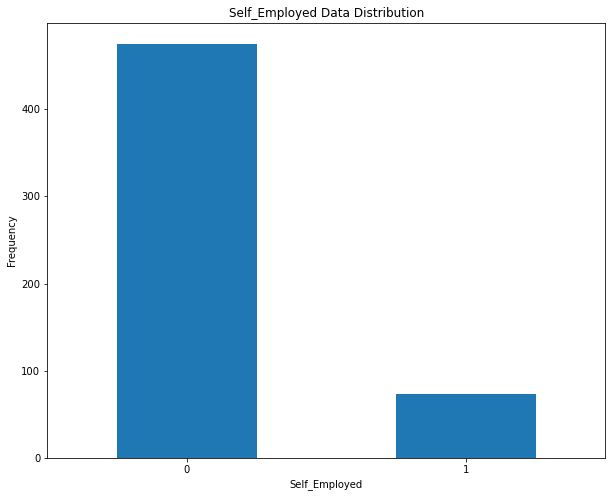

In [88]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Self_Employed'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Self_Employed Data Distribution")


plt.xlabel("Self_Employed")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

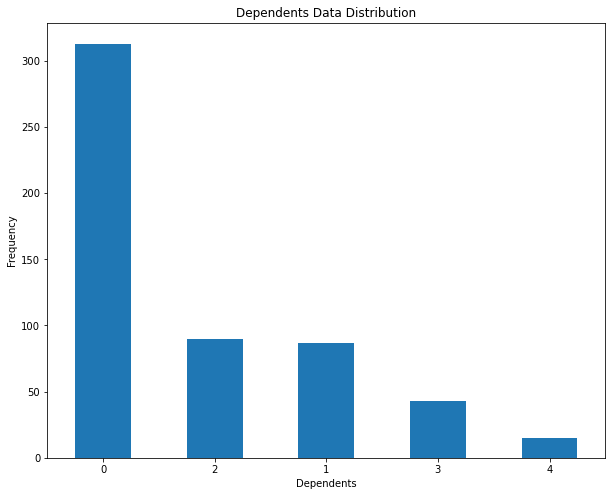

In [89]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Dependents'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Dependents Data Distribution")


plt.xlabel("Dependents")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

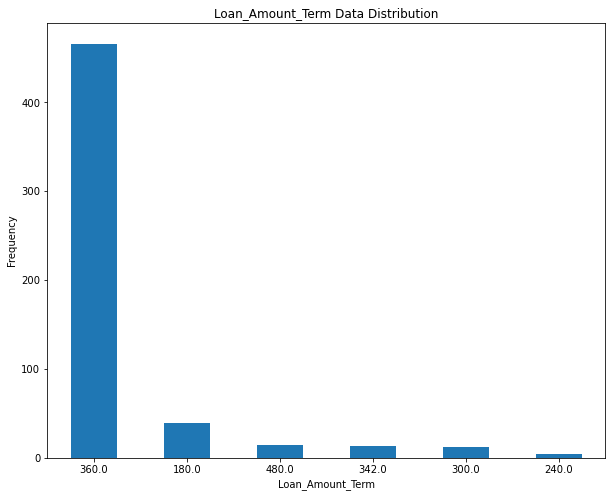

In [90]:
plt.figure(figsize=[10,8])
count_classes = pd.value_counts(new_df['Loan_Amount_Term'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Loan_Amount_Term Data Distribution")


plt.xlabel("Loan_Amount_Term")
plt.ylabel("Frequency")


In [91]:
NO1 = new_df[new_df['Gender']==0]
NO1.shape

(100, 13)

In [92]:
NO2 = new_df[new_df['Gender']==1]
NO2.shape

(437, 13)

In [93]:
NO3 = new_df[new_df['Gender']==2]
NO3.shape

(11, 13)

In [94]:
NO4 = new_df[new_df['Married']==0]
NO4.shape

(190, 13)

In [95]:
NO5 = new_df[new_df['Married']==1]
NO5.shape

(355, 13)

In [96]:
NO6 = new_df[new_df['Married']==2]
NO6.shape

(3, 13)

In [97]:
NO7 = new_df[new_df['Education']==1]
NO7.shape

(125, 13)

In [98]:
NO8 = new_df[new_df['Education']==0]
NO8.shape

(423, 13)

In [99]:
NO9 = new_df[new_df['Self_Employed']==0]
NO9.shape

(475, 13)

In [100]:
NO10 = new_df[new_df['Self_Employed']==1]
NO10.shape

(73, 13)

In [101]:
NO11 = new_df[new_df['Dependents']==0]
NO11.shape

(313, 13)

In [102]:
NO12 = new_df[new_df['Dependents']==1]
NO12.shape

(87, 13)

In [103]:
NO13 = new_df[new_df['Dependents']==2]
NO13.shape

(90, 13)

In [104]:
NO14 = new_df[new_df['Dependents']==3]
NO14.shape

(43, 13)

In [105]:
NO15 = new_df[new_df['Dependents']==4]
NO15.shape

(15, 13)

In [106]:
NO16 = new_df[new_df['Loan_Amount_Term']==360]
NO16.shape

(466, 13)

In [107]:
NO17 = new_df[new_df['Loan_Amount_Term']==180]
NO17.shape

(39, 13)

In [108]:
NO18 = new_df[new_df['Loan_Amount_Term']==480]
NO18.shape

(14, 13)

In [109]:
NO19 = new_df[new_df['Loan_Amount_Term']==342]
NO19.shape

(13, 13)

In [110]:
NO20 = new_df[new_df['Loan_Amount_Term']==300]
NO20.shape

(12, 13)

In [111]:
NO21 = new_df[new_df['Loan_Amount_Term']==240]
NO21.shape

(4, 13)

In [112]:
from imblearn.over_sampling import RandomOverSampler

In [113]:
os = RandomOverSampler()

In [114]:
A_train_res, B_train_res = os.fit_resample(a, b)

In [115]:
C_train_res, D_train_res = os.fit_resample(c, d)

In [116]:
E_train_res, F_train_res = os.fit_resample(e, f)

In [117]:
G_train_res, H_train_res = os.fit_resample(g, h)

In [118]:
I_train_res, J_train_res = os.fit_resample(i, j)

In [119]:
O_train_res, P_train_res = os.fit_resample(o, p)

In [120]:
from collections import Counter

In [121]:
print('Original Gender dataset shape{}'.format(Counter(b)))

Original Gender dataset shapeCounter({1: 437, 0: 100, 2: 11})


In [122]:
print('Original Married dataset shape{}'.format(Counter(d)))

Original Married dataset shapeCounter({1: 355, 0: 190, 2: 3})


In [123]:
print('Original Education dataset shape{}'.format(Counter(f)))

Original Education dataset shapeCounter({0.0: 423, 1.0: 125})


In [124]:
print('Original Self_Employed dataset shape{}'.format(Counter(h)))

Original Self_Employed dataset shapeCounter({0: 475, 1: 73})


In [125]:
print('Original Dependents dataset shape{}'.format(Counter(j)))

Original Dependents dataset shapeCounter({0: 313, 2: 90, 1: 87, 3: 43, 4: 15})


In [126]:
print('Original Loan_Amount_Term dataset shape{}'.format(Counter(p)))

Original Loan_Amount_Term dataset shapeCounter({360.0: 466, 180.0: 39, 480.0: 14, 342.0: 13, 300.0: 12, 240.0: 4})


In [127]:
print('Resampled Gender dataset shape{}'.format(Counter(B_train_res)))

Resampled Gender dataset shapeCounter({1: 437, 0: 437, 2: 437})


In [128]:
print('Resampled Married dataset shape{}'.format(Counter(D_train_res)))

Resampled Married dataset shapeCounter({0: 355, 1: 355, 2: 355})


In [129]:
print('Resampled Education dataset shape{}'.format(Counter(F_train_res)))

Resampled Education dataset shapeCounter({0.0: 423, 1.0: 423})


In [130]:
print('Resampled Self_Employed dataset shape{}'.format(Counter(H_train_res)))

Resampled Self_Employed dataset shapeCounter({0: 475, 1: 475})


In [131]:
print('Resampled Dependents dataset shape{}'.format(Counter(J_train_res)))

Resampled Dependents dataset shapeCounter({0: 313, 1: 313, 2: 313, 3: 313, 4: 313})


In [132]:
print('Resampled Loan_Amount_Term dataset shape{}'.format(Counter(P_train_res)))

Resampled Loan_Amount_Term dataset shapeCounter({360.0: 466, 240.0: 466, 342.0: 466, 180.0: 466, 300.0: 466, 480.0: 466})


# To check skewness and and apply Tranformation based on Gaussian distribution

In [133]:
new_df.skew()

Loan_ID              0.006474
Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      2.115295
CoapplicantIncome    1.369775
LoanAmount           1.103178
Loan_Amount_Term    -2.029308
Credit_History      -1.862149
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

In [134]:
import scipy.stats as Stat
import matplotlib.pyplot as plt
import pylab

In [135]:
def Plotter(new_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    new_df[feature].hist()
    plt.subplot(1,2,2)
    Stat.probplot(new_df[feature],dist='norm',plot=pylab)
    plt.show()

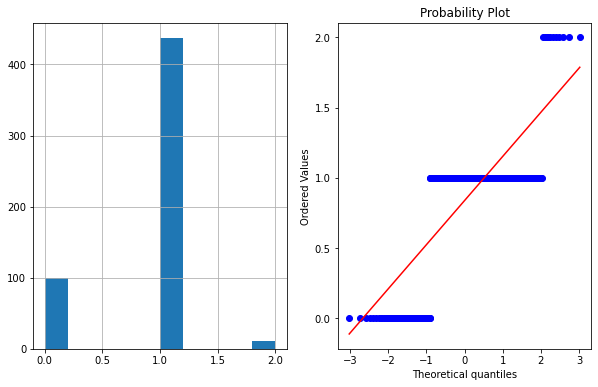

In [136]:
Plotter(new_df,'Gender')

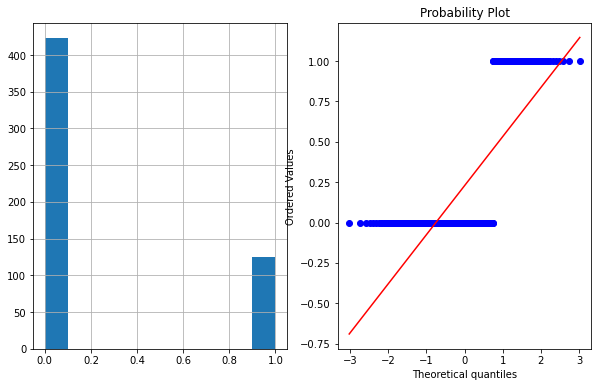

In [137]:
Plotter(new_df,'Education')

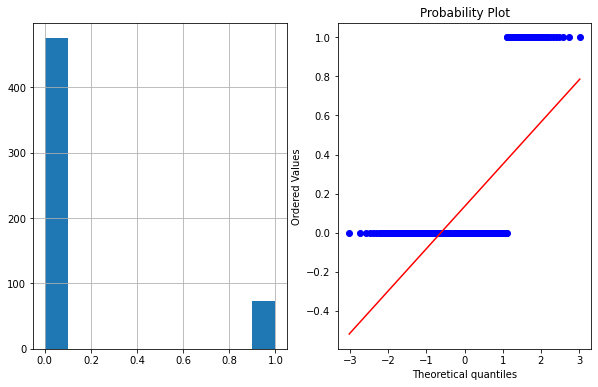

In [138]:
Plotter(new_df,'Self_Employed')

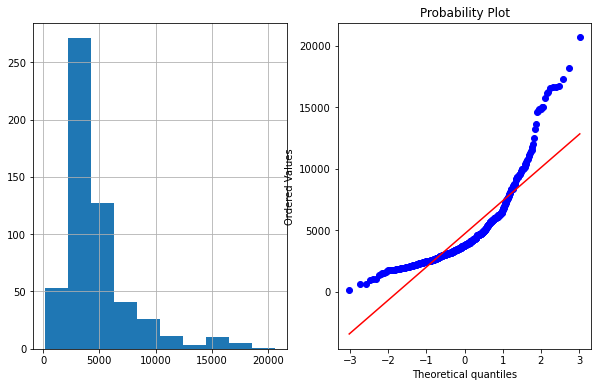

In [139]:
Plotter(new_df,'ApplicantIncome')

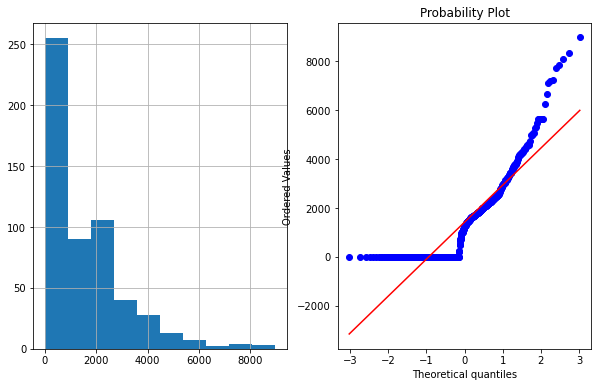

In [140]:
Plotter(new_df,'CoapplicantIncome')

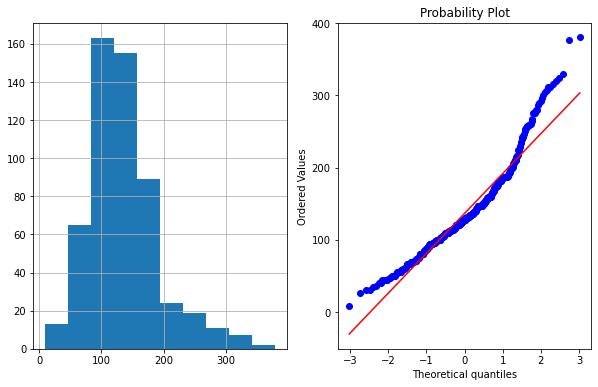

In [141]:
Plotter(new_df,'LoanAmount')

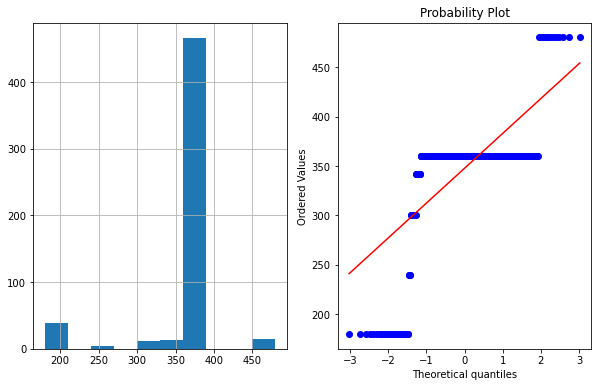

In [142]:
Plotter(new_df,'Loan_Amount_Term')

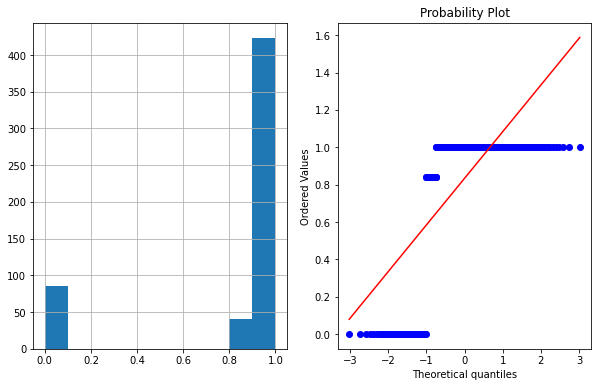

In [143]:
Plotter(new_df,'Credit_History')

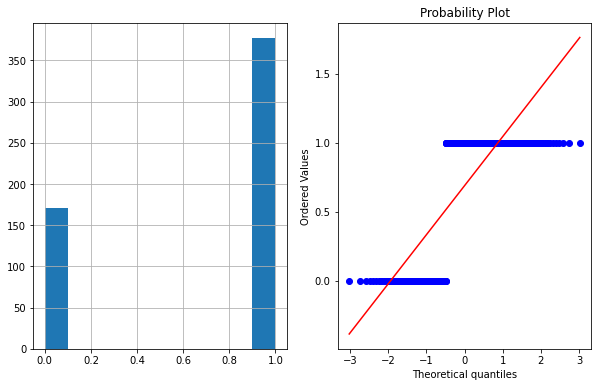

In [144]:
Plotter(new_df,'Loan_Status')

* In the above Probability Analysis of the Columns having Skewness we observe only [ 'Applicant Income, Co Applicant Income, Loan Amount' ] Columns are best fit for Transformations as they follow Gaussian Distribution.

In [145]:
new_df.skew()

Loan_ID              0.006474
Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      2.115295
CoapplicantIncome    1.369775
LoanAmount           1.103178
Loan_Amount_Term    -2.029308
Credit_History      -1.862149
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

In [146]:
import scipy.stats as Stat
import pylab

In [147]:
# Since Gender Has Binary Values after encoding we do not perfrom a Transformation

In [148]:
new_df['Dependents'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

,sqrt,exp,reciprocal,log
0,0.000000,1.000000,-2147483648,-inf
1,1.000000,2.718282,1,0.000000
2,0.000000,1.000000,-2147483648,-inf
3,0.000000,1.000000,-2147483648,-inf
4,0.000000,1.000000,-2147483648,-inf
...,...,...,...,...
609,0.000000,1.000000,-2147483648,-inf
610,1.732051,20.085537,0,1.098612
611,1.000000,2.718282,1,0.000000
612,1.414214,7.389056,0,0.693147


In [149]:
new_df['Dependents'] = np.sqrt(new_df['Dependents'])

In [150]:
new_df['ApplicantIncome'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

,sqrt,exp,reciprocal,log
0,76.478755,inf,0,8.674026
1,67.697858,inf,0,8.430109
2,54.772256,inf,0,8.006368
3,50.823223,inf,0,7.856707
4,77.459667,inf,0,8.699515
...,...,...,...,...
609,53.851648,inf,0,7.972466
610,64.078077,inf,0,8.320205
611,89.844310,inf,0,8.996157
612,87.080423,inf,0,8.933664


In [151]:
new_df['ApplicantIncome'] = np.sqrt(new_df['ApplicantIncome'])
new_df['ApplicantIncome'] = np.sqrt(new_df['ApplicantIncome'])
new_df['ApplicantIncome'] = np.sqrt(new_df['ApplicantIncome'])

In [152]:
new_df['CoapplicantIncome'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

,sqrt,exp,reciprocal,log
0,0.000000,1.000000e+00,inf,-inf
1,38.832976,inf,0.000663,7.318540
2,0.000000,1.000000e+00,inf,-inf
3,48.559242,inf,0.000424,7.765569
4,0.000000,1.000000e+00,inf,-inf
...,...,...,...,...
609,0.000000,1.000000e+00,inf,-inf
610,0.000000,1.000000e+00,inf,-inf
611,15.491933,1.700888e+104,0.004167,5.480639
612,0.000000,1.000000e+00,inf,-inf


In [153]:
new_df['CoapplicantIncome'] = np.sqrt(new_df['CoapplicantIncome'])

In [154]:
new_df['LoanAmount'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

,sqrt,exp,reciprocal,log
0,12.100089,3.854731e+63,0.006830,4.986426
1,11.313708,3.887708e+55,0.007812,4.852030
2,8.124038,4.607187e+28,0.015152,4.189655
3,10.954451,1.304181e+52,0.008333,4.787492
4,11.874342,1.719974e+61,0.007092,4.948760
...,...,...,...,...
609,8.426150,6.837671e+30,0.014085,4.262680
610,6.324555,2.353853e+17,0.025000,3.688879
611,15.905974,7.524955e+109,0.003953,5.533389
612,13.674794,1.633308e+81,0.005348,5.231109


In [155]:
new_df['LoanAmount'] = np.sqrt(new_df['LoanAmount'])

In [156]:
new_df['Loan_Amount_Term'].transform([np.sqrt, np.exp, np.reciprocal, np.log])

,sqrt,exp,reciprocal,log
0,18.973666,2.218265e+156,0.002778,5.886104
1,18.973666,2.218265e+156,0.002778,5.886104
2,18.973666,2.218265e+156,0.002778,5.886104
3,18.973666,2.218265e+156,0.002778,5.886104
4,18.973666,2.218265e+156,0.002778,5.886104
...,...,...,...,...
609,18.973666,2.218265e+156,0.002778,5.886104
610,13.416408,1.489384e+78,0.005556,5.192957
611,18.973666,2.218265e+156,0.002778,5.886104
612,18.973666,2.218265e+156,0.002778,5.886104


In [157]:
new_df['Loan_Amount_Term'], parameters = Stat.boxcox(new_df['Loan_Amount_Term'])

In [158]:
new_df.skew()

Loan_ID              0.006474
Gender              -0.980211
Married             -0.527102
Dependents           0.553549
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.409244
CoapplicantIncome    0.228178
LoanAmount           0.319707
Loan_Amount_Term     0.691413
Credit_History      -1.862149
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

# Since Gender, Education, Self_Employed, Credit_History, Loan_Status are all categorical columns and have been balanced in the previous steps we do not need to remove their skewness

# Scaling DataFrame

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
newDataFrame = new_df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [161]:
newilocDF = newDataFrame.iloc[:,:-1]

In [162]:
for col in newilocDF:
    sc = StandardScaler()
    newilocDF[col] = sc.fit_transform(newilocDF[[col]])

In [163]:
newilocDF

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.735084,0.386931,-1.356769,-0.827783,-0.543607,-0.392026,0.656354,-1.040202,0.277232,0.140495,0.463639,1.228921
1,-1.729407,0.386931,0.702814,0.595321,-0.543607,-0.392026,0.201641,0.445352,-0.054356,0.140495,0.463639,-1.312395
2,-1.723729,0.386931,0.702814,-0.827783,-0.543607,2.550853,-0.556078,-1.040202,-1.399323,0.140495,0.463639,1.228921
3,-1.718052,0.386931,0.702814,-0.827783,1.839565,-0.392026,-0.814248,0.817429,-0.205841,0.140495,0.463639,1.228921
4,-1.712374,0.386931,-1.356769,-0.827783,-0.543607,-0.392026,0.704676,-1.040202,0.182043,0.140495,0.463639,1.228921
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.722528,-1.995520,-1.356769,-0.827783,-0.543607,-0.392026,-0.614983,-1.040202,-1.271934,0.140495,0.463639,-1.312395
610,1.728205,0.386931,0.702814,1.637106,-0.543607,-0.392026,0.001243,-1.040202,-2.158099,-2.548394,0.463639,-1.312395
611,1.733883,0.386931,0.702814,0.595321,-0.543607,-0.392026,1.278518,-0.447559,1.882035,0.140495,0.463639,1.228921
612,1.739560,0.386931,0.702814,1.184791,-0.543607,-0.392026,1.155853,-1.040202,0.941228,0.140495,0.463639,1.228921


# Separating the Features columns and Target Column:

In [164]:
features=newilocDF
target=new_df["Loan_Status"]

# Classification Test Model 1

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [166]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    LR.fit(features_train, target_train)
    pred_train=LR.predict(features_train)
    pred_test=LR.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8223844282238444
At random state 0,the testing accuracy is: 0.8248175182481752


At random state 1,the training accuracy is: 0.8150851581508516
At random state 1,the testing accuracy is: 0.8394160583941606


At random state 2,the training accuracy is: 0.829683698296837
At random state 2,the testing accuracy is: 0.7956204379562044


At random state 3,the training accuracy is: 0.8199513381995134
At random state 3,the testing accuracy is: 0.8248175182481752


At random state 4,the training accuracy is: 0.8248175182481752
At random state 4,the testing accuracy is: 0.8102189781021898


At random state 5,the training accuracy is: 0.8150851581508516
At random state 5,the testing accuracy is: 0.8540145985401459


At random state 6,the training accuracy is: 0.8150851581508516
At random state 6,the testing accuracy is: 0.8394160583941606


At random state 7,the training accuracy is: 0.829683698296837
At random state 7,the testing accuracy is: 0.81021

At random state 67,the testing accuracy is: 0.8248175182481752


At random state 68,the training accuracy is: 0.8345498783454987
At random state 68,the testing accuracy is: 0.781021897810219


At random state 69,the training accuracy is: 0.8248175182481752
At random state 69,the testing accuracy is: 0.8248175182481752


At random state 70,the training accuracy is: 0.8175182481751826
At random state 70,the testing accuracy is: 0.8321167883211679


At random state 71,the training accuracy is: 0.8175182481751826
At random state 71,the testing accuracy is: 0.8321167883211679


At random state 72,the training accuracy is: 0.8345498783454987
At random state 72,the testing accuracy is: 0.7883211678832118


At random state 73,the training accuracy is: 0.8345498783454987
At random state 73,the testing accuracy is: 0.7883211678832118


At random state 74,the training accuracy is: 0.8126520681265208
At random state 74,the testing accuracy is: 0.8613138686131386


At random state 75,the training a

At random state 132,the training accuracy is: 0.8150851581508516
At random state 132,the testing accuracy is: 0.8394160583941606


At random state 133,the training accuracy is: 0.8321167883211679
At random state 133,the testing accuracy is: 0.781021897810219


At random state 134,the training accuracy is: 0.8102189781021898
At random state 134,the testing accuracy is: 0.8467153284671532


At random state 135,the training accuracy is: 0.8199513381995134
At random state 135,the testing accuracy is: 0.8248175182481752


At random state 136,the training accuracy is: 0.829683698296837
At random state 136,the testing accuracy is: 0.8029197080291971


At random state 137,the training accuracy is: 0.8175182481751826
At random state 137,the testing accuracy is: 0.8248175182481752


At random state 138,the training accuracy is: 0.8102189781021898
At random state 138,the testing accuracy is: 0.8467153284671532


At random state 139,the training accuracy is: 0.8321167883211679
At random state 139,

At random state 198,the testing accuracy is: 0.8248175182481752


At random state 199,the training accuracy is: 0.8150851581508516
At random state 199,the testing accuracy is: 0.8394160583941606


At random state 200,the training accuracy is: 0.8150851581508516
At random state 200,the testing accuracy is: 0.8248175182481752


At random state 201,the training accuracy is: 0.8102189781021898
At random state 201,the testing accuracy is: 0.8540145985401459


At random state 202,the training accuracy is: 0.8199513381995134
At random state 202,the testing accuracy is: 0.8394160583941606


At random state 203,the training accuracy is: 0.8102189781021898
At random state 203,the testing accuracy is: 0.8686131386861314


At random state 204,the training accuracy is: 0.8248175182481752
At random state 204,the testing accuracy is: 0.8102189781021898


At random state 205,the training accuracy is: 0.8223844282238444
At random state 205,the testing accuracy is: 0.8175182481751826


At random state 2

At random state 263,the testing accuracy is: 0.8029197080291971


At random state 264,the training accuracy is: 0.8345498783454987
At random state 264,the testing accuracy is: 0.7883211678832118


At random state 265,the training accuracy is: 0.8418491484184915
At random state 265,the testing accuracy is: 0.7737226277372263


At random state 266,the training accuracy is: 0.8102189781021898
At random state 266,the testing accuracy is: 0.8686131386861314


At random state 267,the training accuracy is: 0.8150851581508516
At random state 267,the testing accuracy is: 0.8467153284671532


At random state 268,the training accuracy is: 0.8102189781021898
At random state 268,the testing accuracy is: 0.8540145985401459


At random state 269,the training accuracy is: 0.8175182481751826
At random state 269,the testing accuracy is: 0.8394160583941606


At random state 270,the training accuracy is: 0.8369829683698297
At random state 270,the testing accuracy is: 0.7883211678832118


At random state 2

At random state 331,the testing accuracy is: 0.7737226277372263


At random state 332,the training accuracy is: 0.8248175182481752
At random state 332,the testing accuracy is: 0.8248175182481752


At random state 333,the training accuracy is: 0.8199513381995134
At random state 333,the testing accuracy is: 0.8248175182481752


At random state 334,the training accuracy is: 0.8248175182481752
At random state 334,the testing accuracy is: 0.8175182481751826


At random state 335,the training accuracy is: 0.8345498783454987
At random state 335,the testing accuracy is: 0.7883211678832118


At random state 336,the training accuracy is: 0.8345498783454987
At random state 336,the testing accuracy is: 0.781021897810219


At random state 337,the training accuracy is: 0.8223844282238444
At random state 337,the testing accuracy is: 0.8175182481751826


At random state 338,the training accuracy is: 0.8272506082725061
At random state 338,the testing accuracy is: 0.8029197080291971


At random state 33

At random state 395,the testing accuracy is: 0.8321167883211679


At random state 396,the training accuracy is: 0.8126520681265208
At random state 396,the testing accuracy is: 0.8467153284671532


At random state 397,the training accuracy is: 0.8102189781021898
At random state 397,the testing accuracy is: 0.8540145985401459


At random state 398,the training accuracy is: 0.8394160583941606
At random state 398,the testing accuracy is: 0.7737226277372263


At random state 399,the training accuracy is: 0.8150851581508516
At random state 399,the testing accuracy is: 0.8394160583941606


At random state 400,the training accuracy is: 0.805352798053528
At random state 400,the testing accuracy is: 0.8613138686131386


At random state 401,the training accuracy is: 0.8272506082725061
At random state 401,the testing accuracy is: 0.8029197080291971


At random state 402,the training accuracy is: 0.8102189781021898
At random state 402,the testing accuracy is: 0.8540145985401459


At random state 40

At random state 465,the testing accuracy is: 0.8102189781021898


At random state 466,the training accuracy is: 0.8345498783454987
At random state 466,the testing accuracy is: 0.781021897810219


At random state 467,the training accuracy is: 0.8345498783454987
At random state 467,the testing accuracy is: 0.7883211678832118


At random state 468,the training accuracy is: 0.8223844282238444
At random state 468,the testing accuracy is: 0.8102189781021898


At random state 469,the training accuracy is: 0.8272506082725061
At random state 469,the testing accuracy is: 0.8102189781021898


At random state 470,the training accuracy is: 0.8248175182481752
At random state 470,the testing accuracy is: 0.8175182481751826


At random state 471,the training accuracy is: 0.8004866180048662
At random state 471,the testing accuracy is: 0.8905109489051094


At random state 472,the training accuracy is: 0.8150851581508516
At random state 472,the testing accuracy is: 0.8321167883211679


At random state 47

In [167]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=192)

In [168]:
LR.fit(features_train, target_train)

LogisticRegression()

In [169]:
pred_test=LR.predict(features_test)

In [170]:
accuracy_score(target_test, pred_test)

0.8905109489051095

# Here we observe that we get : 89% accuracy for this model

In [171]:
f1_score(target_test, pred_test, average='micro')

0.8905109489051094

# Here we confirm that this model gives : 89% accuracy assuming average as micro argument

# Cross-Validation the Model 1

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
lin_score = cross_val_score(LR,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.17272727, 0.22727273, 0.20909091, 0.12844037, 0.16513761])

In [174]:
np.mean(lin_score_n)

0.18053377814845706

In [175]:
cross_val_score(LR,features,target,cv=5).mean()

0.8194662218515429

# Here we find the mean_score is at : 0.18% which is < 5% and cross val score is at 81% which is good for our model

# Classification Test Model 2

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
SVC=SVC()

In [177]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    SVC.fit(features_train, target_train)
    pred_train=SVC.predict(features_train)
    pred_test=SVC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8369829683698297
At random state 0,the testing accuracy is: 0.8248175182481752


At random state 1,the training accuracy is: 0.8369829683698297
At random state 1,the testing accuracy is: 0.8321167883211679


At random state 2,the training accuracy is: 0.8442822384428225
At random state 2,the testing accuracy is: 0.8029197080291971


At random state 3,the training accuracy is: 0.8321167883211679
At random state 3,the testing accuracy is: 0.8321167883211679


At random state 4,the training accuracy is: 0.851581508515815
At random state 4,the testing accuracy is: 0.7956204379562044


At random state 5,the training accuracy is: 0.8345498783454987
At random state 5,the testing accuracy is: 0.8467153284671532


At random state 6,the training accuracy is: 0.8369829683698297
At random state 6,the testing accuracy is: 0.8321167883211679


At random state 7,the training accuracy is: 0.8394160583941606
At random state 7,the testing accuracy is: 0.8102

At random state 65,the testing accuracy is: 0.8394160583941606


At random state 66,the training accuracy is: 0.8369829683698297
At random state 66,the testing accuracy is: 0.8394160583941606


At random state 67,the training accuracy is: 0.8321167883211679
At random state 67,the testing accuracy is: 0.8248175182481752


At random state 68,the training accuracy is: 0.8491484184914841
At random state 68,the testing accuracy is: 0.7883211678832118


At random state 69,the training accuracy is: 0.8467153284671532
At random state 69,the testing accuracy is: 0.8248175182481752


At random state 70,the training accuracy is: 0.8442822384428225
At random state 70,the testing accuracy is: 0.8248175182481752


At random state 71,the training accuracy is: 0.8345498783454987
At random state 71,the testing accuracy is: 0.8102189781021898


At random state 72,the training accuracy is: 0.8491484184914841
At random state 72,the testing accuracy is: 0.7883211678832118


At random state 73,the training 

At random state 129,the testing accuracy is: 0.8248175182481752


At random state 130,the training accuracy is: 0.8345498783454987
At random state 130,the testing accuracy is: 0.8467153284671532


At random state 131,the training accuracy is: 0.8394160583941606
At random state 131,the testing accuracy is: 0.8321167883211679


At random state 132,the training accuracy is: 0.8345498783454987
At random state 132,the testing accuracy is: 0.8394160583941606


At random state 133,the training accuracy is: 0.8491484184914841
At random state 133,the testing accuracy is: 0.781021897810219


At random state 134,the training accuracy is: 0.8418491484184915
At random state 134,the testing accuracy is: 0.8540145985401459


At random state 135,the training accuracy is: 0.8394160583941606
At random state 135,the testing accuracy is: 0.8321167883211679


At random state 136,the training accuracy is: 0.8418491484184915
At random state 136,the testing accuracy is: 0.8029197080291971


At random state 13

At random state 193,the testing accuracy is: 0.8613138686131386


At random state 194,the training accuracy is: 0.8369829683698297
At random state 194,the testing accuracy is: 0.8248175182481752


At random state 195,the training accuracy is: 0.8394160583941606
At random state 195,the testing accuracy is: 0.8394160583941606


At random state 196,the training accuracy is: 0.8369829683698297
At random state 196,the testing accuracy is: 0.8102189781021898


At random state 197,the training accuracy is: 0.8442822384428225
At random state 197,the testing accuracy is: 0.8175182481751826


At random state 198,the training accuracy is: 0.8345498783454987
At random state 198,the testing accuracy is: 0.8394160583941606


At random state 199,the training accuracy is: 0.8369829683698297
At random state 199,the testing accuracy is: 0.8467153284671532


At random state 200,the training accuracy is: 0.8369829683698297
At random state 200,the testing accuracy is: 0.8321167883211679


At random state 2

At random state 258,the training accuracy is: 0.8540145985401459
At random state 258,the testing accuracy is: 0.7956204379562044


At random state 259,the training accuracy is: 0.8467153284671532
At random state 259,the testing accuracy is: 0.8248175182481752


At random state 260,the training accuracy is: 0.8369829683698297
At random state 260,the testing accuracy is: 0.8175182481751826


At random state 261,the training accuracy is: 0.8613138686131386
At random state 261,the testing accuracy is: 0.7737226277372263


At random state 262,the training accuracy is: 0.8491484184914841
At random state 262,the testing accuracy is: 0.8102189781021898


At random state 263,the training accuracy is: 0.8394160583941606
At random state 263,the testing accuracy is: 0.8102189781021898


At random state 264,the training accuracy is: 0.8442822384428225
At random state 264,the testing accuracy is: 0.7737226277372263


At random state 265,the training accuracy is: 0.8588807785888077
At random state 26

At random state 321,the training accuracy is: 0.8442822384428225
At random state 321,the testing accuracy is: 0.8175182481751826


At random state 322,the training accuracy is: 0.8345498783454987
At random state 322,the testing accuracy is: 0.8467153284671532


At random state 323,the training accuracy is: 0.8418491484184915
At random state 323,the testing accuracy is: 0.8248175182481752


At random state 324,the training accuracy is: 0.8467153284671532
At random state 324,the testing accuracy is: 0.8029197080291971


At random state 325,the training accuracy is: 0.851581508515815
At random state 325,the testing accuracy is: 0.7956204379562044


At random state 326,the training accuracy is: 0.8540145985401459
At random state 326,the testing accuracy is: 0.7518248175182483


At random state 327,the training accuracy is: 0.8321167883211679
At random state 327,the testing accuracy is: 0.8467153284671532


At random state 328,the training accuracy is: 0.8442822384428225
At random state 328

At random state 386,the training accuracy is: 0.8150851581508516
At random state 386,the testing accuracy is: 0.8905109489051094


At random state 387,the training accuracy is: 0.8491484184914841
At random state 387,the testing accuracy is: 0.8248175182481752


At random state 388,the training accuracy is: 0.8540145985401459
At random state 388,the testing accuracy is: 0.7883211678832118


At random state 389,the training accuracy is: 0.8369829683698297
At random state 389,the testing accuracy is: 0.8613138686131386


At random state 390,the training accuracy is: 0.8345498783454987
At random state 390,the testing accuracy is: 0.8394160583941606


At random state 391,the training accuracy is: 0.8223844282238444
At random state 391,the testing accuracy is: 0.8905109489051094


At random state 392,the training accuracy is: 0.8637469586374696
At random state 392,the testing accuracy is: 0.7445255474452555


At random state 393,the training accuracy is: 0.8248175182481752
At random state 39

At random state 449,the testing accuracy is: 0.7737226277372263


At random state 450,the training accuracy is: 0.8491484184914841
At random state 450,the testing accuracy is: 0.7956204379562044


At random state 451,the training accuracy is: 0.8321167883211679
At random state 451,the testing accuracy is: 0.8321167883211679


At random state 452,the training accuracy is: 0.8418491484184915
At random state 452,the testing accuracy is: 0.8029197080291971


At random state 453,the training accuracy is: 0.8418491484184915
At random state 453,the testing accuracy is: 0.8102189781021898


At random state 454,the training accuracy is: 0.8321167883211679
At random state 454,the testing accuracy is: 0.8613138686131386


At random state 455,the training accuracy is: 0.8345498783454987
At random state 455,the testing accuracy is: 0.8321167883211679


At random state 456,the training accuracy is: 0.8418491484184915
At random state 456,the testing accuracy is: 0.7956204379562044


At random state 4

In [178]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=192)

In [179]:
SVC.fit(features_train, target_train)

SVC()

In [180]:
pred_test=SVC.predict(features_test)

In [181]:
accuracy_score(target_test, pred_test)

0.8759124087591241

# Here we observe that we get : 87% accuracy for this model

In [182]:
f1_score(target_test, pred_test, average='micro')

0.8759124087591241

# Here we confirm that this model gives : 87% accuracy assuming average as micro argument

# Cross-Validation the Model 2

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
lin_score = cross_val_score(SVC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.15454545, 0.23636364, 0.2       , 0.11926606, 0.17431193])

In [185]:
np.mean(lin_score_n)

0.1768974145120934

In [186]:
cross_val_score(SVC,features,target,cv=5).mean()

0.8231025854879066

# Here we find the mean_score is at : 0.17% which is < 5% and cross val score is at 82% which is good for our model

# Classification Test Model 3

In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
DTC=GradientBoostingClassifier()

In [188]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    DTC.fit(features_train, target_train)
    pred_train=DTC.predict(features_train)
    pred_test=DTC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.9294403892944039
At random state 0,the testing accuracy is: 0.8175182481751826


At random state 1,the training accuracy is: 0.9318734793187348
At random state 1,the testing accuracy is: 0.7956204379562044


At random state 2,the training accuracy is: 0.9294403892944039
At random state 2,the testing accuracy is: 0.7518248175182483


At random state 3,the training accuracy is: 0.927007299270073
At random state 3,the testing accuracy is: 0.7883211678832118


At random state 4,the training accuracy is: 0.9391727493917275
At random state 4,the testing accuracy is: 0.7737226277372263


At random state 5,the training accuracy is: 0.9148418491484185
At random state 5,the testing accuracy is: 0.8467153284671532


At random state 6,the training accuracy is: 0.9051094890510949
At random state 6,the testing accuracy is: 0.7956204379562044


At random state 7,the training accuracy is: 0.9124087591240876
At random state 7,the testing accuracy is: 0.8029

At random state 64,the training accuracy is: 0.927007299270073
At random state 64,the testing accuracy is: 0.8029197080291971


At random state 65,the training accuracy is: 0.927007299270073
At random state 65,the testing accuracy is: 0.8102189781021898


At random state 66,the training accuracy is: 0.9075425790754258
At random state 66,the testing accuracy is: 0.8248175182481752


At random state 67,the training accuracy is: 0.9294403892944039
At random state 67,the testing accuracy is: 0.8321167883211679


At random state 68,the training accuracy is: 0.9318734793187348
At random state 68,the testing accuracy is: 0.7737226277372263


At random state 69,the training accuracy is: 0.9343065693430657
At random state 69,the testing accuracy is: 0.7445255474452555


At random state 70,the training accuracy is: 0.9172749391727494
At random state 70,the testing accuracy is: 0.7883211678832118


At random state 71,the training accuracy is: 0.9367396593673966
At random state 71,the testing accu

At random state 128,the training accuracy is: 0.9294403892944039
At random state 128,the testing accuracy is: 0.8175182481751826


At random state 129,the training accuracy is: 0.9318734793187348
At random state 129,the testing accuracy is: 0.8102189781021898


At random state 130,the training accuracy is: 0.9197080291970803
At random state 130,the testing accuracy is: 0.8321167883211679


At random state 131,the training accuracy is: 0.927007299270073
At random state 131,the testing accuracy is: 0.7591240875912408


At random state 132,the training accuracy is: 0.9245742092457421
At random state 132,the testing accuracy is: 0.8175182481751826


At random state 133,the training accuracy is: 0.9391727493917275
At random state 133,the testing accuracy is: 0.7737226277372263


At random state 134,the training accuracy is: 0.9148418491484185
At random state 134,the testing accuracy is: 0.8102189781021898


At random state 135,the training accuracy is: 0.9148418491484185
At random state 135

At random state 191,the training accuracy is: 0.9075425790754258
At random state 191,the testing accuracy is: 0.7956204379562044


At random state 192,the training accuracy is: 0.9075425790754258
At random state 192,the testing accuracy is: 0.8832116788321168


At random state 193,the training accuracy is: 0.9124087591240876
At random state 193,the testing accuracy is: 0.8321167883211679


At random state 194,the training accuracy is: 0.9318734793187348
At random state 194,the testing accuracy is: 0.7883211678832118


At random state 195,the training accuracy is: 0.927007299270073
At random state 195,the testing accuracy is: 0.8248175182481752


At random state 196,the training accuracy is: 0.9440389294403891
At random state 196,the testing accuracy is: 0.7737226277372263


At random state 197,the training accuracy is: 0.9318734793187348
At random state 197,the testing accuracy is: 0.8102189781021898


At random state 198,the training accuracy is: 0.9148418491484185
At random state 198

At random state 254,the training accuracy is: 0.9197080291970803
At random state 254,the testing accuracy is: 0.8394160583941606


At random state 255,the training accuracy is: 0.9537712895377128
At random state 255,the testing accuracy is: 0.8029197080291971


At random state 256,the training accuracy is: 0.9318734793187348
At random state 256,the testing accuracy is: 0.7883211678832118


At random state 257,the training accuracy is: 0.9294403892944039
At random state 257,the testing accuracy is: 0.8467153284671532


At random state 258,the training accuracy is: 0.9343065693430657
At random state 258,the testing accuracy is: 0.7664233576642334


At random state 259,the training accuracy is: 0.9245742092457421
At random state 259,the testing accuracy is: 0.7664233576642334


At random state 260,the training accuracy is: 0.9245742092457421
At random state 260,the testing accuracy is: 0.8102189781021898


At random state 261,the training accuracy is: 0.9148418491484185
At random state 26

At random state 317,the training accuracy is: 0.9051094890510949
At random state 317,the testing accuracy is: 0.8613138686131386


At random state 318,the training accuracy is: 0.927007299270073
At random state 318,the testing accuracy is: 0.781021897810219


At random state 319,the training accuracy is: 0.9318734793187348
At random state 319,the testing accuracy is: 0.8102189781021898


At random state 320,the training accuracy is: 0.9221411192214112
At random state 320,the testing accuracy is: 0.8029197080291971


At random state 321,the training accuracy is: 0.927007299270073
At random state 321,the testing accuracy is: 0.7883211678832118


At random state 322,the training accuracy is: 0.9537712895377128
At random state 322,the testing accuracy is: 0.781021897810219


At random state 323,the training accuracy is: 0.9294403892944039
At random state 323,the testing accuracy is: 0.7883211678832118


At random state 324,the training accuracy is: 0.927007299270073
At random state 324,the

At random state 380,the testing accuracy is: 0.8175182481751826


At random state 381,the training accuracy is: 0.9172749391727494
At random state 381,the testing accuracy is: 0.781021897810219


At random state 382,the training accuracy is: 0.9148418491484185
At random state 382,the testing accuracy is: 0.8248175182481752


At random state 383,the training accuracy is: 0.927007299270073
At random state 383,the testing accuracy is: 0.8029197080291971


At random state 384,the training accuracy is: 0.927007299270073
At random state 384,the testing accuracy is: 0.7956204379562044


At random state 385,the training accuracy is: 0.9294403892944039
At random state 385,the testing accuracy is: 0.781021897810219


At random state 386,the training accuracy is: 0.9245742092457421
At random state 386,the testing accuracy is: 0.8686131386861314


At random state 387,the training accuracy is: 0.9221411192214112
At random state 387,the testing accuracy is: 0.8029197080291971


At random state 388,t

At random state 444,the training accuracy is: 0.9245742092457421
At random state 444,the testing accuracy is: 0.8394160583941606


At random state 445,the training accuracy is: 0.9197080291970803
At random state 445,the testing accuracy is: 0.7883211678832118


At random state 446,the training accuracy is: 0.9391727493917275
At random state 446,the testing accuracy is: 0.8102189781021898


At random state 447,the training accuracy is: 0.9343065693430657
At random state 447,the testing accuracy is: 0.8321167883211679


At random state 448,the training accuracy is: 0.9148418491484185
At random state 448,the testing accuracy is: 0.8102189781021898


At random state 449,the training accuracy is: 0.9294403892944039
At random state 449,the testing accuracy is: 0.7664233576642334


At random state 450,the training accuracy is: 0.9440389294403891
At random state 450,the testing accuracy is: 0.7883211678832118


At random state 451,the training accuracy is: 0.9245742092457421
At random state 45

In [189]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=192)

In [190]:
DTC.fit(features_train, target_train)

GradientBoostingClassifier()

In [191]:
pred_test=DTC.predict(features_test)

In [192]:
accuracy_score(target_test, pred_test)

0.8832116788321168

# Here we observe that we get : 88% accuracy for this model

In [193]:
f1_score(target_test, pred_test, average='micro')

0.8832116788321168

# Here we confirm that this model gives : 88% accuracy assuming average as micro argument

# Cross-Validation the Model 3

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
lin_score = cross_val_score(DTC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.48181818, 0.25454545, 0.20909091, 0.17431193, 0.35779817])

In [196]:
np.mean(lin_score_n)

0.29551292743953295

In [197]:
cross_val_score(DTC,features,target,cv=5).mean()

0.7026688907422852

# Here we find the mean_score is at : 0.29% which is < 5% and cross val score is at 70% which is good for our model

# Classification Test Model 4

In [198]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
LGBM=KNeighborsClassifier()

In [199]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    LGBM.fit(features_train, target_train)
    pred_train=LGBM.predict(features_train)
    pred_test=LGBM.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8345498783454987
At random state 0,the testing accuracy is: 0.7956204379562044


At random state 1,the training accuracy is: 0.8369829683698297
At random state 1,the testing accuracy is: 0.7956204379562044


At random state 2,the training accuracy is: 0.8418491484184915
At random state 2,the testing accuracy is: 0.7883211678832118


At random state 3,the training accuracy is: 0.8345498783454987
At random state 3,the testing accuracy is: 0.8029197080291971


At random state 4,the training accuracy is: 0.8394160583941606
At random state 4,the testing accuracy is: 0.7664233576642334


At random state 5,the training accuracy is: 0.8175182481751826
At random state 5,the testing accuracy is: 0.8321167883211679


At random state 6,the training accuracy is: 0.8248175182481752
At random state 6,the testing accuracy is: 0.8248175182481752


At random state 7,the training accuracy is: 0.8369829683698297
At random state 7,the testing accuracy is: 0.795

At random state 67,the training accuracy is: 0.829683698296837
At random state 67,the testing accuracy is: 0.8029197080291971


At random state 68,the training accuracy is: 0.8369829683698297
At random state 68,the testing accuracy is: 0.7737226277372263


At random state 69,the training accuracy is: 0.8369829683698297
At random state 69,the testing accuracy is: 0.781021897810219


At random state 70,the training accuracy is: 0.8272506082725061
At random state 70,the testing accuracy is: 0.7956204379562044


At random state 71,the training accuracy is: 0.8248175182481752
At random state 71,the testing accuracy is: 0.8248175182481752


At random state 72,the training accuracy is: 0.8442822384428225
At random state 72,the testing accuracy is: 0.7737226277372263


At random state 73,the training accuracy is: 0.8394160583941606
At random state 73,the testing accuracy is: 0.7591240875912408


At random state 74,the training accuracy is: 0.8175182481751826
At random state 74,the testing accu

At random state 133,the training accuracy is: 0.8418491484184915
At random state 133,the testing accuracy is: 0.7445255474452555


At random state 134,the training accuracy is: 0.829683698296837
At random state 134,the testing accuracy is: 0.8321167883211679


At random state 135,the training accuracy is: 0.829683698296837
At random state 135,the testing accuracy is: 0.781021897810219


At random state 136,the training accuracy is: 0.8394160583941606
At random state 136,the testing accuracy is: 0.7664233576642334


At random state 137,the training accuracy is: 0.8345498783454987
At random state 137,the testing accuracy is: 0.7956204379562044


At random state 138,the training accuracy is: 0.8248175182481752
At random state 138,the testing accuracy is: 0.8394160583941606


At random state 139,the training accuracy is: 0.8442822384428225
At random state 139,the testing accuracy is: 0.7664233576642334


At random state 140,the training accuracy is: 0.8467153284671532
At random state 140,t

At random state 198,the training accuracy is: 0.8369829683698297
At random state 198,the testing accuracy is: 0.781021897810219


At random state 199,the training accuracy is: 0.8418491484184915
At random state 199,the testing accuracy is: 0.8102189781021898


At random state 200,the training accuracy is: 0.8345498783454987
At random state 200,the testing accuracy is: 0.8175182481751826


At random state 201,the training accuracy is: 0.829683698296837
At random state 201,the testing accuracy is: 0.8394160583941606


At random state 202,the training accuracy is: 0.8272506082725061
At random state 202,the testing accuracy is: 0.8175182481751826


At random state 203,the training accuracy is: 0.8321167883211679
At random state 203,the testing accuracy is: 0.781021897810219


At random state 204,the training accuracy is: 0.8321167883211679
At random state 204,the testing accuracy is: 0.8029197080291971


At random state 205,the training accuracy is: 0.8418491484184915
At random state 205,t

At random state 264,the training accuracy is: 0.8394160583941606
At random state 264,the testing accuracy is: 0.781021897810219


At random state 265,the training accuracy is: 0.8467153284671532
At random state 265,the testing accuracy is: 0.7372262773722628


At random state 266,the training accuracy is: 0.8321167883211679
At random state 266,the testing accuracy is: 0.8394160583941606


At random state 267,the training accuracy is: 0.8369829683698297
At random state 267,the testing accuracy is: 0.8102189781021898


At random state 268,the training accuracy is: 0.8394160583941606
At random state 268,the testing accuracy is: 0.8175182481751826


At random state 269,the training accuracy is: 0.8126520681265208
At random state 269,the testing accuracy is: 0.8248175182481752


At random state 270,the training accuracy is: 0.8442822384428225
At random state 270,the testing accuracy is: 0.781021897810219


At random state 271,the training accuracy is: 0.8369829683698297
At random state 271,

At random state 327,the training accuracy is: 0.8272506082725061
At random state 327,the testing accuracy is: 0.8175182481751826


At random state 328,the training accuracy is: 0.8467153284671532
At random state 328,the testing accuracy is: 0.8175182481751826


At random state 329,the training accuracy is: 0.8248175182481752
At random state 329,the testing accuracy is: 0.8175182481751826


At random state 330,the training accuracy is: 0.8272506082725061
At random state 330,the testing accuracy is: 0.8102189781021898


At random state 331,the training accuracy is: 0.851581508515815
At random state 331,the testing accuracy is: 0.7591240875912408


At random state 332,the training accuracy is: 0.8248175182481752
At random state 332,the testing accuracy is: 0.8029197080291971


At random state 333,the training accuracy is: 0.829683698296837
At random state 333,the testing accuracy is: 0.7956204379562044


At random state 334,the training accuracy is: 0.8394160583941606
At random state 334,

At random state 390,the training accuracy is: 0.8321167883211679
At random state 390,the testing accuracy is: 0.8102189781021898


At random state 391,the training accuracy is: 0.7980535279805353
At random state 391,the testing accuracy is: 0.8613138686131386


At random state 392,the training accuracy is: 0.8564476885644768
At random state 392,the testing accuracy is: 0.7153284671532847


At random state 393,the training accuracy is: 0.8248175182481752
At random state 393,the testing accuracy is: 0.8175182481751826


At random state 394,the training accuracy is: 0.8248175182481752
At random state 394,the testing accuracy is: 0.7956204379562044


At random state 395,the training accuracy is: 0.8248175182481752
At random state 395,the testing accuracy is: 0.7956204379562044


At random state 396,the training accuracy is: 0.8321167883211679
At random state 396,the testing accuracy is: 0.8248175182481752


At random state 397,the training accuracy is: 0.8248175182481752
At random state 39

At random state 454,the training accuracy is: 0.8394160583941606
At random state 454,the testing accuracy is: 0.8102189781021898


At random state 455,the training accuracy is: 0.8223844282238444
At random state 455,the testing accuracy is: 0.8102189781021898


At random state 456,the training accuracy is: 0.8467153284671532
At random state 456,the testing accuracy is: 0.7664233576642334


At random state 457,the training accuracy is: 0.8442822384428225
At random state 457,the testing accuracy is: 0.7518248175182483


At random state 458,the training accuracy is: 0.8394160583941606
At random state 458,the testing accuracy is: 0.7956204379562044


At random state 459,the training accuracy is: 0.8467153284671532
At random state 459,the testing accuracy is: 0.7956204379562044


At random state 460,the training accuracy is: 0.8345498783454987
At random state 460,the testing accuracy is: 0.8102189781021898


At random state 461,the training accuracy is: 0.8321167883211679
At random state 46

In [200]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=192)

In [201]:
LGBM.fit(features_train, target_train)

KNeighborsClassifier()

In [202]:
pred_test=LGBM.predict(features_test)

In [203]:
accuracy_score(target_test, pred_test)

0.7956204379562044

# Here we observe that we get : 79% accuracy for this model

In [204]:
f1_score(target_test, pred_test, average='micro')

0.7956204379562044

# Here we confirm that this model gives : 79% accuracy assuming average as micro argument

# Cross-Validation the Model 4

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
lin_score = cross_val_score(LGBM,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.19090909, 0.27272727, 0.2       , 0.1559633 , 0.19266055])

In [207]:
np.mean(lin_score_n)

0.20245204336947453

In [208]:
cross_val_score(LGBM,features,target,cv=5).mean()

0.7975479566305255

# Here we find the mean_score is at : 0.20% which is < 5% and cross val score is at 79% which is good for our model

# Classification Test Model 5

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [210]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    NB.fit(features_train, target_train)
    pred_train=NB.predict(features_train)
    pred_test=NB.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.8175182481751826
At random state 0,the testing accuracy is: 0.8321167883211679


At random state 1,the training accuracy is: 0.8102189781021898
At random state 1,the testing accuracy is: 0.8029197080291971


At random state 2,the training accuracy is: 0.8248175182481752
At random state 2,the testing accuracy is: 0.8102189781021898


At random state 3,the training accuracy is: 0.8102189781021898
At random state 3,the testing accuracy is: 0.8467153284671532


At random state 4,the training accuracy is: 0.8175182481751826
At random state 4,the testing accuracy is: 0.7591240875912408


At random state 5,the training accuracy is: 0.8126520681265208
At random state 5,the testing accuracy is: 0.8321167883211679


At random state 6,the training accuracy is: 0.8150851581508516
At random state 6,the testing accuracy is: 0.8394160583941606


At random state 7,the training accuracy is: 0.8175182481751826
At random state 7,the testing accuracy is: 0.802

At random state 65,the training accuracy is: 0.8150851581508516
At random state 65,the testing accuracy is: 0.8321167883211679


At random state 66,the training accuracy is: 0.805352798053528
At random state 66,the testing accuracy is: 0.8321167883211679


At random state 67,the training accuracy is: 0.8199513381995134
At random state 67,the testing accuracy is: 0.8248175182481752


At random state 68,the training accuracy is: 0.8345498783454987
At random state 68,the testing accuracy is: 0.781021897810219


At random state 69,the training accuracy is: 0.8175182481751826
At random state 69,the testing accuracy is: 0.8102189781021898


At random state 70,the training accuracy is: 0.8175182481751826
At random state 70,the testing accuracy is: 0.8175182481751826


At random state 71,the training accuracy is: 0.8175182481751826
At random state 71,the testing accuracy is: 0.8029197080291971


At random state 72,the training accuracy is: 0.829683698296837
At random state 72,the testing accur

At random state 130,the testing accuracy is: 0.8102189781021898


At random state 131,the training accuracy is: 0.8199513381995134
At random state 131,the testing accuracy is: 0.8175182481751826


At random state 132,the training accuracy is: 0.8126520681265208
At random state 132,the testing accuracy is: 0.8467153284671532


At random state 133,the training accuracy is: 0.829683698296837
At random state 133,the testing accuracy is: 0.7956204379562044


At random state 134,the training accuracy is: 0.8077858880778589
At random state 134,the testing accuracy is: 0.8613138686131386


At random state 135,the training accuracy is: 0.8126520681265208
At random state 135,the testing accuracy is: 0.8321167883211679


At random state 136,the training accuracy is: 0.8248175182481752
At random state 136,the testing accuracy is: 0.7956204379562044


At random state 137,the training accuracy is: 0.8150851581508516
At random state 137,the testing accuracy is: 0.8102189781021898


At random state 13

At random state 203,the testing accuracy is: 0.8540145985401459


At random state 204,the training accuracy is: 0.8199513381995134
At random state 204,the testing accuracy is: 0.8248175182481752


At random state 205,the training accuracy is: 0.8223844282238444
At random state 205,the testing accuracy is: 0.8175182481751826


At random state 206,the training accuracy is: 0.8199513381995134
At random state 206,the testing accuracy is: 0.8248175182481752


At random state 207,the training accuracy is: 0.829683698296837
At random state 207,the testing accuracy is: 0.781021897810219


At random state 208,the training accuracy is: 0.8150851581508516
At random state 208,the testing accuracy is: 0.8175182481751826


At random state 209,the training accuracy is: 0.8150851581508516
At random state 209,the testing accuracy is: 0.8248175182481752


At random state 210,the training accuracy is: 0.8223844282238444
At random state 210,the testing accuracy is: 0.7664233576642334


At random state 211

At random state 271,the testing accuracy is: 0.8613138686131386


At random state 272,the training accuracy is: 0.8150851581508516
At random state 272,the testing accuracy is: 0.8175182481751826


At random state 273,the training accuracy is: 0.8248175182481752
At random state 273,the testing accuracy is: 0.8102189781021898


At random state 274,the training accuracy is: 0.805352798053528
At random state 274,the testing accuracy is: 0.8102189781021898


At random state 275,the training accuracy is: 0.8175182481751826
At random state 275,the testing accuracy is: 0.8321167883211679


At random state 276,the training accuracy is: 0.8126520681265208
At random state 276,the testing accuracy is: 0.8321167883211679


At random state 277,the training accuracy is: 0.8029197080291971
At random state 277,the testing accuracy is: 0.8029197080291971


At random state 278,the training accuracy is: 0.8150851581508516
At random state 278,the testing accuracy is: 0.8029197080291971


At random state 27

At random state 337,the training accuracy is: 0.8223844282238444
At random state 337,the testing accuracy is: 0.8175182481751826


At random state 338,the training accuracy is: 0.8248175182481752
At random state 338,the testing accuracy is: 0.7956204379562044


At random state 339,the training accuracy is: 0.8029197080291971
At random state 339,the testing accuracy is: 0.8467153284671532


At random state 340,the training accuracy is: 0.8029197080291971
At random state 340,the testing accuracy is: 0.8394160583941606


At random state 341,the training accuracy is: 0.805352798053528
At random state 341,the testing accuracy is: 0.8613138686131386


At random state 342,the training accuracy is: 0.8150851581508516
At random state 342,the testing accuracy is: 0.8394160583941606


At random state 343,the training accuracy is: 0.8223844282238444
At random state 343,the testing accuracy is: 0.8175182481751826


At random state 344,the training accuracy is: 0.8272506082725061
At random state 344

At random state 403,the training accuracy is: 0.8223844282238444
At random state 403,the testing accuracy is: 0.8248175182481752


At random state 404,the training accuracy is: 0.8345498783454987
At random state 404,the testing accuracy is: 0.781021897810219


At random state 405,the training accuracy is: 0.8272506082725061
At random state 405,the testing accuracy is: 0.7883211678832118


At random state 406,the training accuracy is: 0.8004866180048662
At random state 406,the testing accuracy is: 0.8394160583941606


At random state 407,the training accuracy is: 0.8077858880778589
At random state 407,the testing accuracy is: 0.8467153284671532


At random state 408,the training accuracy is: 0.8175182481751826
At random state 408,the testing accuracy is: 0.8248175182481752


At random state 409,the training accuracy is: 0.8029197080291971
At random state 409,the testing accuracy is: 0.8613138686131386


At random state 410,the training accuracy is: 0.8150851581508516
At random state 410

At random state 471,the testing accuracy is: 0.8832116788321168


At random state 472,the training accuracy is: 0.8175182481751826
At random state 472,the testing accuracy is: 0.8321167883211679


At random state 473,the training accuracy is: 0.8150851581508516
At random state 473,the testing accuracy is: 0.8248175182481752


At random state 474,the training accuracy is: 0.8467153284671532
At random state 474,the testing accuracy is: 0.7226277372262774


At random state 475,the training accuracy is: 0.8175182481751826
At random state 475,the testing accuracy is: 0.8248175182481752


At random state 476,the training accuracy is: 0.8199513381995134
At random state 476,the testing accuracy is: 0.8102189781021898


At random state 477,the training accuracy is: 0.8126520681265208
At random state 477,the testing accuracy is: 0.8394160583941606


At random state 478,the training accuracy is: 0.8175182481751826
At random state 478,the testing accuracy is: 0.781021897810219


At random state 47

In [211]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=192)

In [212]:
NB.fit(features_train, target_train)

GaussianNB()

In [213]:
pred_test=NB.predict(features_test)

In [214]:
accuracy_score(target_test, pred_test)

0.8686131386861314

# Here we observe that we get : 86% accuracy for this model

In [215]:
f1_score(target_test, pred_test, average='micro')

0.8686131386861314

# Here we confirm that this model gives : 86% accuracy assuming average as micro argument

# Cross-Validation the Model 5

In [216]:
from sklearn.model_selection import cross_val_score

In [217]:
lin_score = cross_val_score(NB,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.17272727, 0.23636364, 0.19090909, 0.11926606, 0.18348624])

In [218]:
np.mean(lin_score_n)

0.18055045871559633

In [219]:
cross_val_score(NB,features,target,cv=5).mean()

0.8194495412844036

# Here we find the mean_score is at : 0.18% which is < 5% and cross val score is at 81% which is good for our model

# AUC-ROC

In [220]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [221]:
print(roc_auc_score(target_test,LR.predict(features_test)))
print(roc_auc_score(target_test,SVC.predict(features_test)))
print(roc_auc_score(target_test,DTC.predict(features_test)))

0.8198453608247422
0.8095360824742268
0.829381443298969


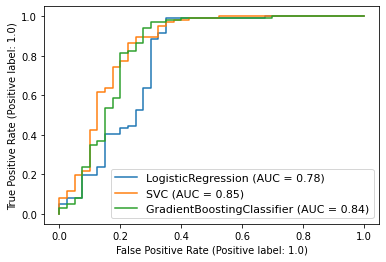

In [222]:
disp = plot_roc_curve(LR,features_test,target_test)
plot_roc_curve(SVC,features_test,target_test,ax=disp.ax_)
plot_roc_curve(DTC,features_test,target_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

# Here we choose Classification Model 3 for Hyper Parameter Tuning, Because of Gradient boost classifer has having good accuracy and the 2nd least of mean value and the best AUC ROC curve

In [223]:
DTC.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

# Hyper Parameter Tuning

In [387]:
from sklearn.model_selection import GridSearchCV

In [388]:
Parameters  = {'loss': ['exponential'],
              'learning_rate': [0.03],
              'ccp_alpha': [0.01], 
               'criterion': ['mae'], 
               'max_depth': [2], 
               'max_features': [8], 
               'max_leaf_nodes': [2], 
               'min_samples_leaf': [34], 
               'n_estimators': [13], 
               'subsample': [1.0], 
               'tol': [1.0],
               'n_estimators': [100,500,1000,1500,2000,2500,3000,3500]}

In [389]:
GCV = GridSearchCV(GradientBoostingClassifier(random_state=192),Parameters,cv=5,verbose=0,n_jobs=-1)

In [390]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=192),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.01], 'criterion': ['mae'],
                         'learning_rate': [0.03], 'loss': ['exponential'],
                         'max_depth': [2], 'max_features': [8],
                         'max_leaf_nodes': [2], 'min_samples_leaf': [34],
                         'n_estimators': [100, 500, 1000, 1500, 2000, 2500,
                                          3000, 3500],
                         'subsample': [1.0], 'tol': [1.0]})

In [391]:
PP = GCV.predict(features_test)

In [399]:
Final_scoreACC = accuracy_score(target_test, PP)

In [400]:
Final_scoreF1 = f1_score(target_test, PP, average='micro')

In [401]:
Final_scoreF1

0.8905109489051094

In [402]:
Final_scoreACC

0.8905109489051095

In [404]:
0.8905109489051095-0.8832116788321168

0.007299270072992692

# Here we are able to achieve a least amount of increase from 88% to 89% and the differnce is 0.007299270072992692

# Confusion Matrix of the selected Model 3

In [405]:
from sklearn.metrics import confusion_matrix

In [407]:
target_predict = DTC.predict(features_test)

In [408]:
CM = confusion_matrix(target_test, target_predict)

In [409]:
CM

array([[28, 12],
       [ 4, 93]], dtype=int64)

<AxesSubplot:>

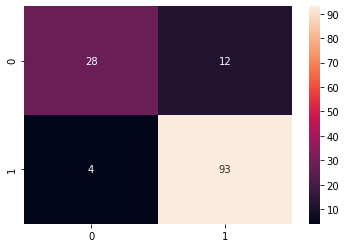

In [410]:
sn.heatmap(CM, annot=True)

* on the Actual values side 0 28 has been predicted correctly

* on the Actual values side 1 93 has been predicted correctly

* on the Predicted values side 0 4 has been not predicted correctly

* on the Predicted values side 1 12 has been not predicted correctly

# Model saving

In [411]:
import pickle
filename = 'Loan_Prediction.pkl'
pickle.dump(Final_scoreACC, open(filename, 'wb'))

# Conclusion

In [414]:
import numpy as np
a = np.array(target_test)
predicted = np.array(GCV.predict(features_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))
df_conclusion

,Original,Predicted
0,0.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
132,0.0,1.0
133,1.0,1.0
134,1.0,1.0
135,1.0,1.0
